Test the variational LDA implementation
==

In [3]:
import numpy as np
import pylab as plt
import pymzml
%matplotlib inline

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/simon/git/inklda/code/')
from lda import LDA

aa_file = '/Users/simon/Dropbox/MS_Ink_Data/Amino Acids/AA_Array_2.mzML'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from lda import LDA_Feature_Extractor as LDAF
fe = LDAF(aa_file,use_scans='even')
fe.make_corpus()

Found 1141 documents
Removing 391 words


In [46]:
from ink_functions import ImagingGrid
ig = ImagingGrid()

In [99]:
from lda import VariationalLDA
v_lda = VariationalLDA(fe.corpus,K=100)
v_lda.run_vb(n_its=200)

Found 403 unique words
Object created with 1141 documents
Document - word matrix created
[[ 3  4 11 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 3  0  9 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  0  0  0]
 [ 3  1 10 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]]
Initialising
Starting iterations
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration

In [124]:
amino_acids = {}
with open('/Users/simon/Dropbox/MS_Ink_Data/Amino Acids/acid_ions.csv','r') as f:
    for line in f:
        split_line = line.split(',')
        amino_acids[split_line[0]] = float(split_line[1])
#     = {'histidine':156.0678,'arginine':175.1190,'proline':116.0706,
#                'phenylalnine':166.0683,'leucine':132.1019,'methionine':150.0583}
print amino_acids

{'L-Glutamic Acid': 148.0604, 'L-Asparagine': 133.0608, 'Hydroxy-L-Proline': 132.0655, 'L-Threonine': 120.0655, 'L-Lysine': 147.1128, 'L-Valine': 118.0863, 'L-Histidine': 156.0768, 'L-Phenylalanine': 166.0863, 'L-Cysteine': 122.027, 'L-Serine': 106.0499, 'L-Arginine2': 175.119, 'L-Glutamine': 147.0764, 'L-Homoserine': 120.0655, 'L-Arginine': 175.119, 'L-Tyrosine*': 182.0812, 'D-Arginine2': 175.119, 'L-Ornithine': 133.0972, 'L-isoleucine': 132.1019, 'L-Alanine': 90.055, 'L-Cystine*': 241.0311, 'L-Aspartic Acid': 134.0448, 'Glycine': 76.039, 'L-Leucine': 132.1019, 'L-Methionine': 150.0583, 'L-Tryptophan': 205.0972, 'L-Proline': 116.0706}


In [101]:
best_topics = {}
lda_words = []
b = v_lda.get_beta()
for w in v_lda.word_index:
    lda_words.append(w)
for a in amino_acids:
    # find the best word in the lda
    closest_idx = np.abs(amino_acids[a] - np.array([float(w) for w in lda_words])).argmin()
    if 1e6*np.abs(amino_acids[a] - float(lda_words[closest_idx]))/amino_acids[a] < 50:
        word = lda_words[closest_idx]
        print "{} -> {} ({})".format(a,word,amino_acids[a])
        word_pos = v_lda.word_index[word]
        best_topics[a] = b[:,word_pos].argmax()
    
    
for a in best_topics:
    print "{} -> {}".format(a,best_topics[a])

L-Valine -> 118.085411716 (118.0863)
L-Histidine -> 156.079996601 (156.0768)
L-Phenylalanine -> 166.084010127 (166.0863)
L-Arginine2 -> 175.120361911 (175.119)
L-Glutamine -> 147.080243151 (147.0764)
L-Arginine -> 175.120361911 (175.119)
D-Arginine2 -> 175.120361911 (175.119)
L-isoleucine -> 132.100106364 (132.1019)
L-Leucine -> 132.100106364 (132.1019)
L-Methionine -> 150.054998045 (150.0583)
L-Proline -> 116.068914362 (116.0706)
L-Methionine -> 48
L-Leucine -> 98
L-Valine -> 53
L-Arginine -> 46
L-Histidine -> 22
L-Proline -> 68
D-Arginine2 -> 46
L-Phenylalanine -> 33
L-isoleucine -> 98
L-Arginine2 -> 46
L-Glutamine -> 25


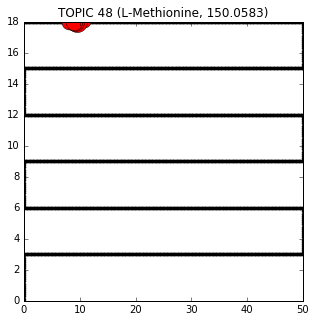

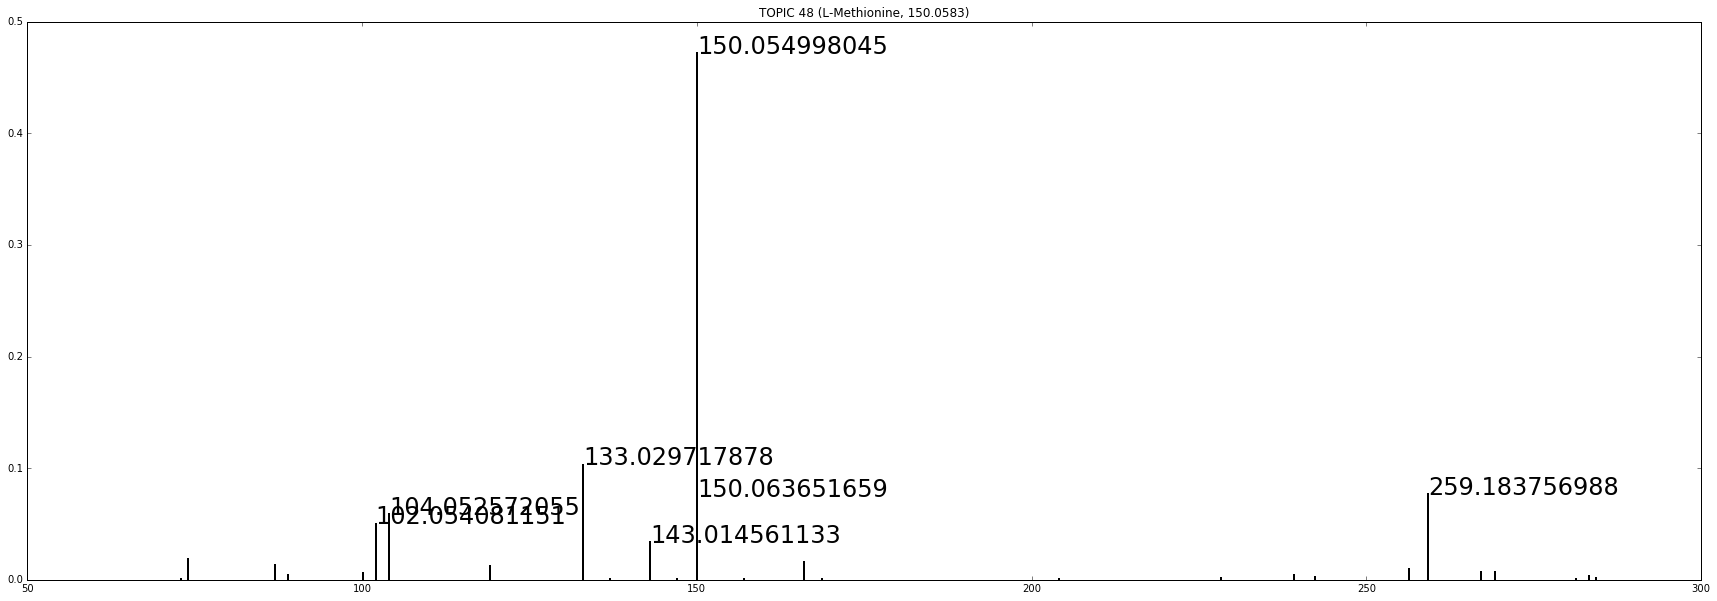

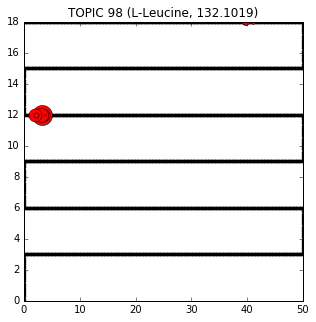

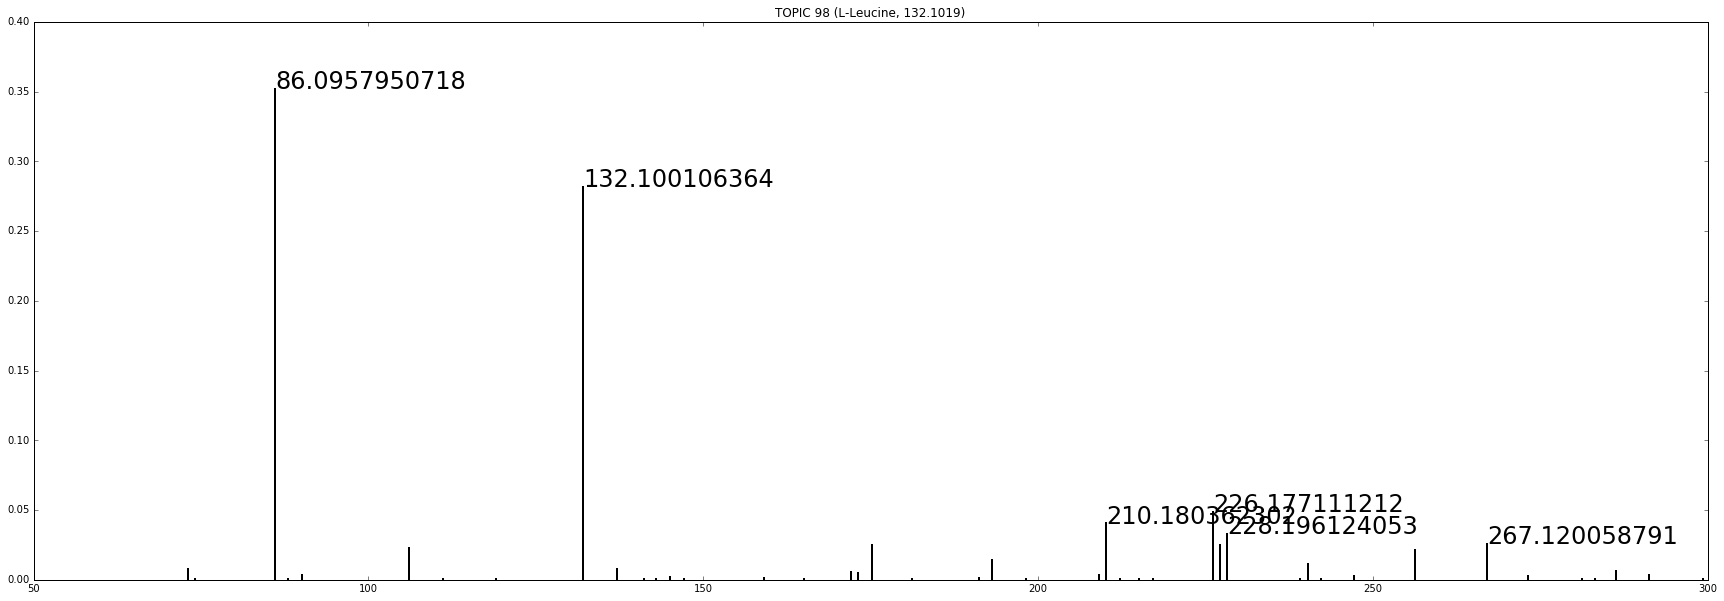

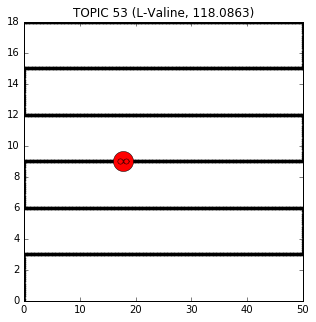

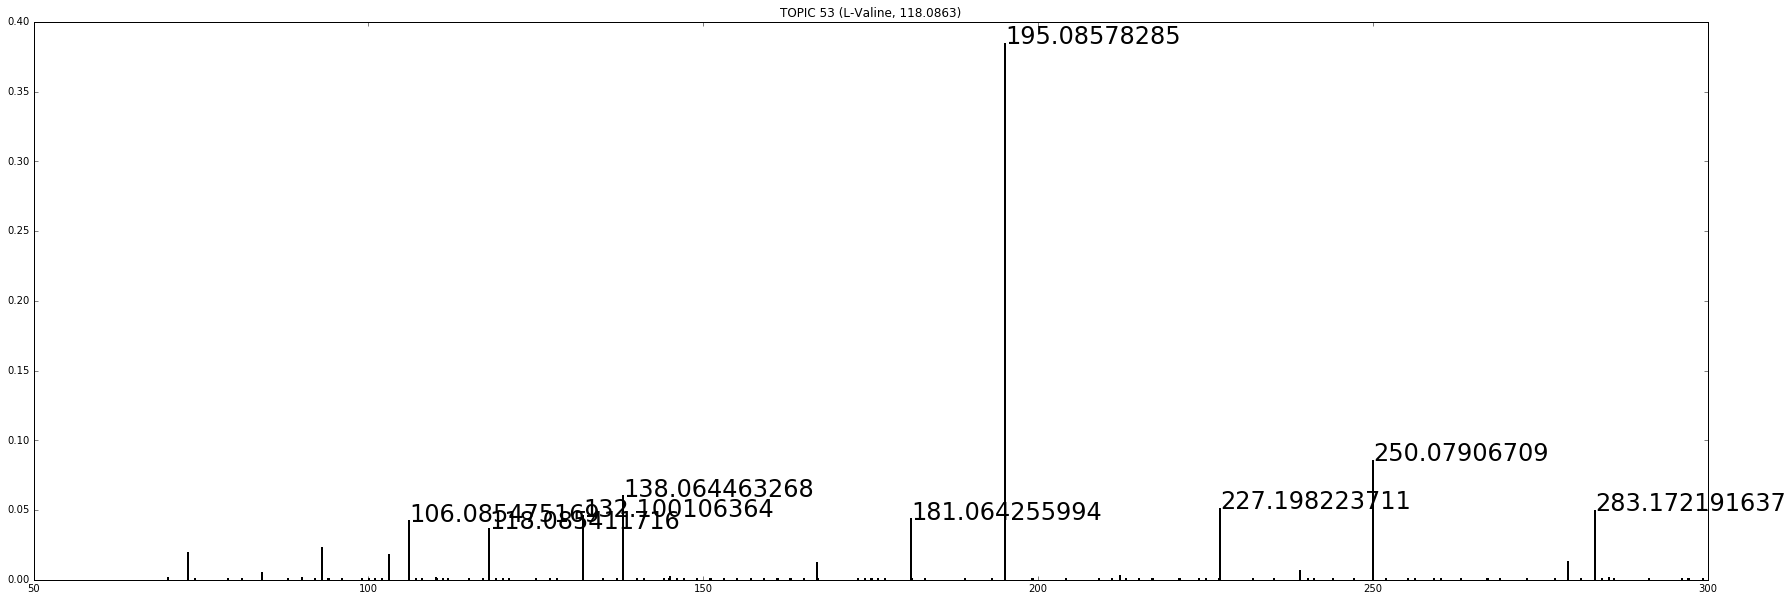

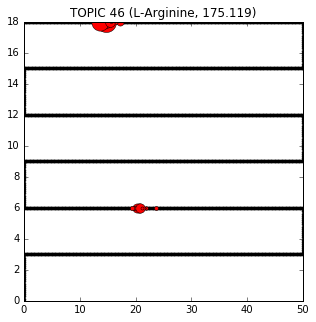

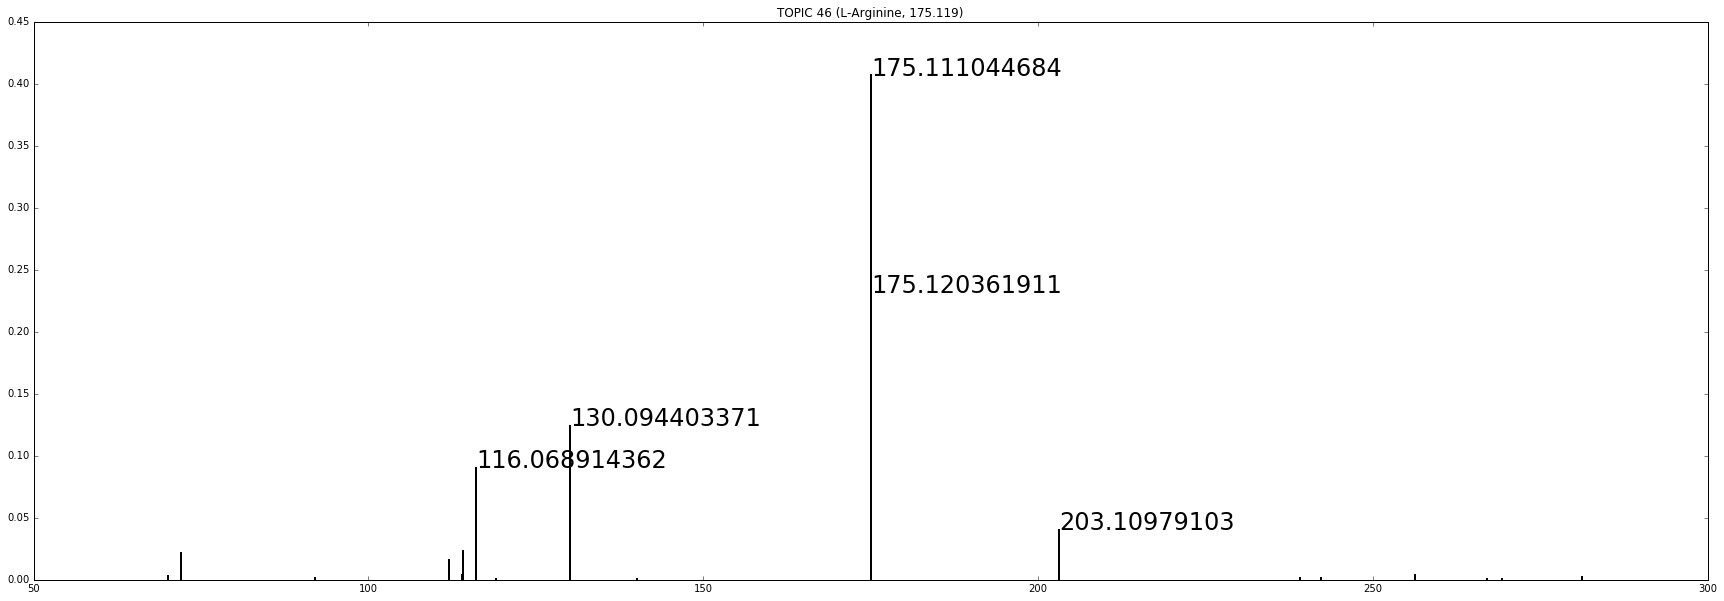

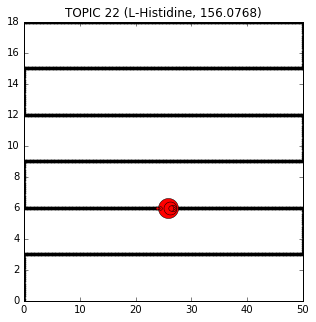

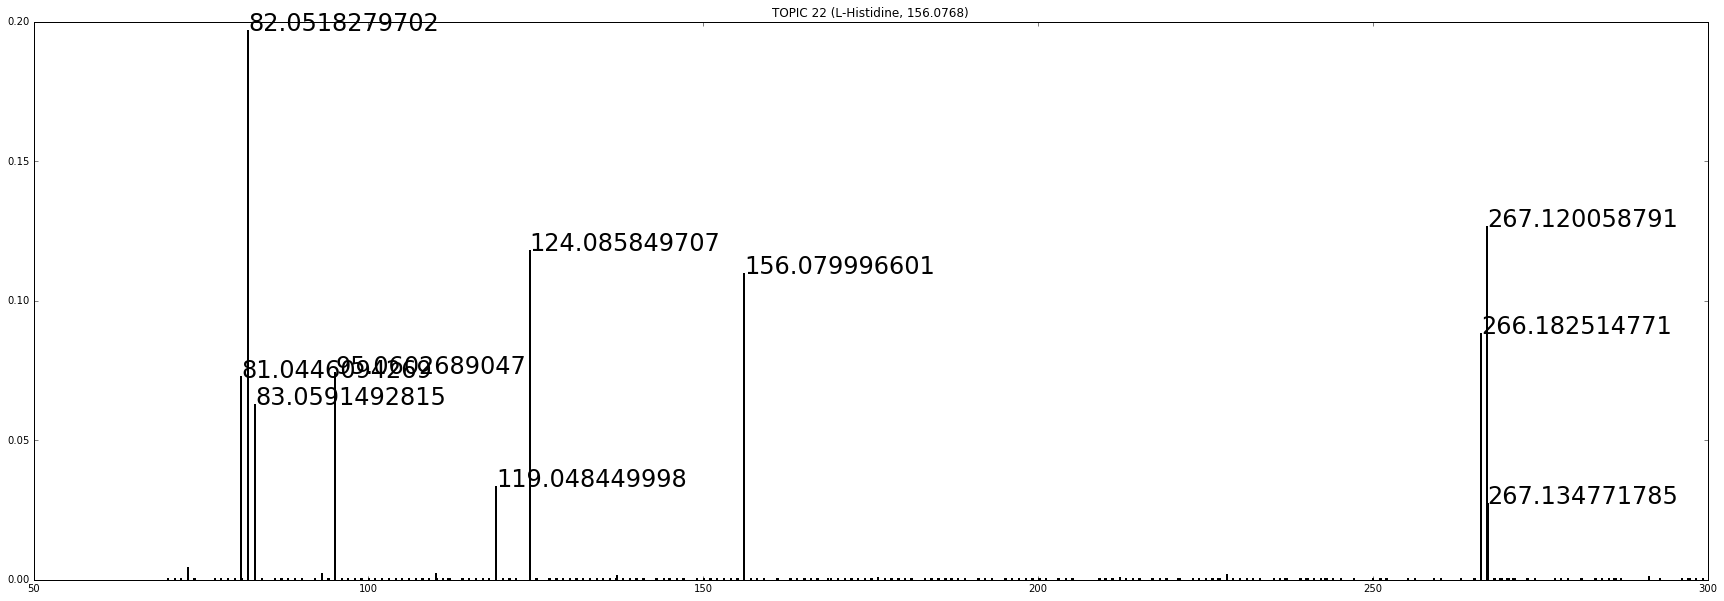

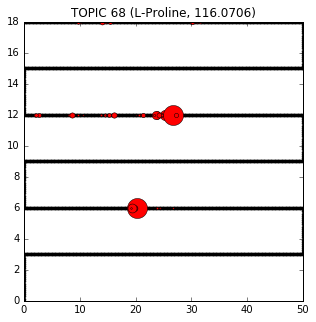

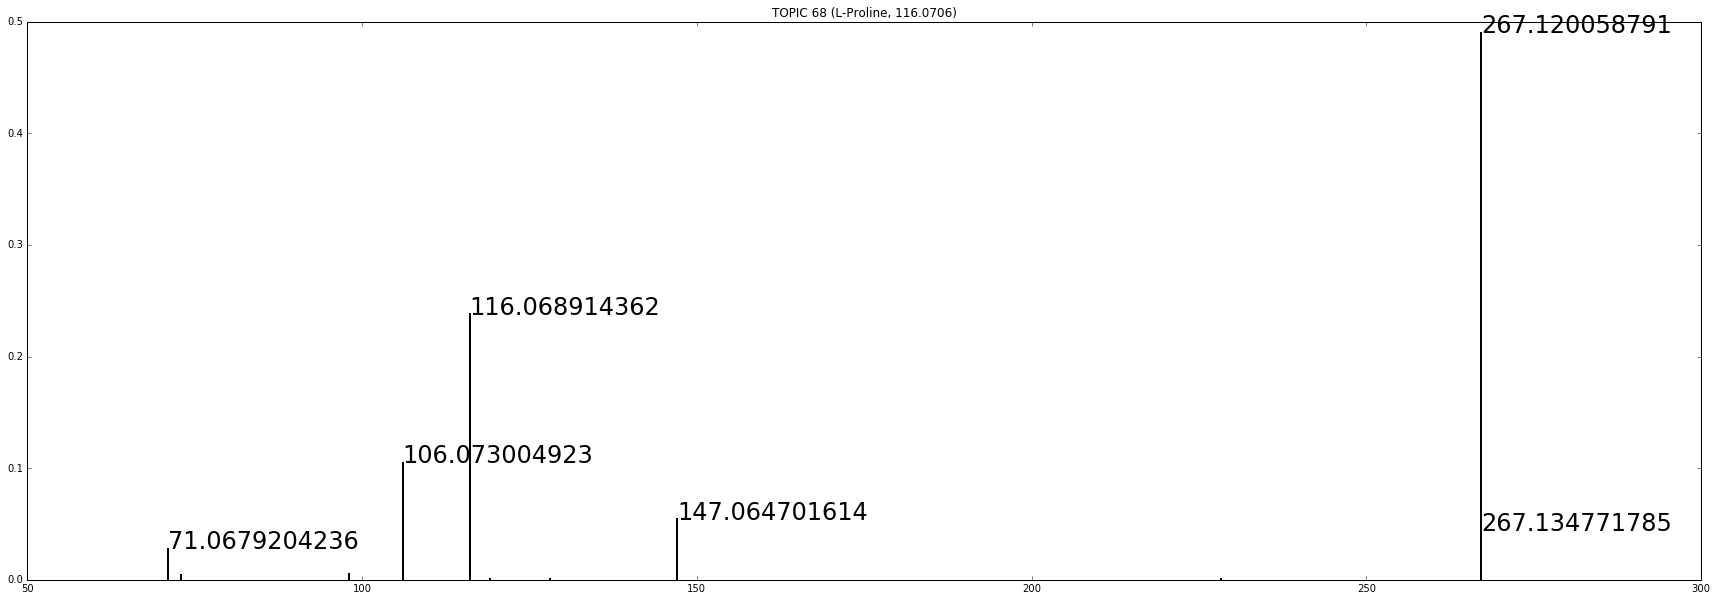

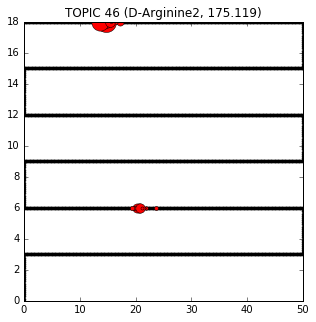

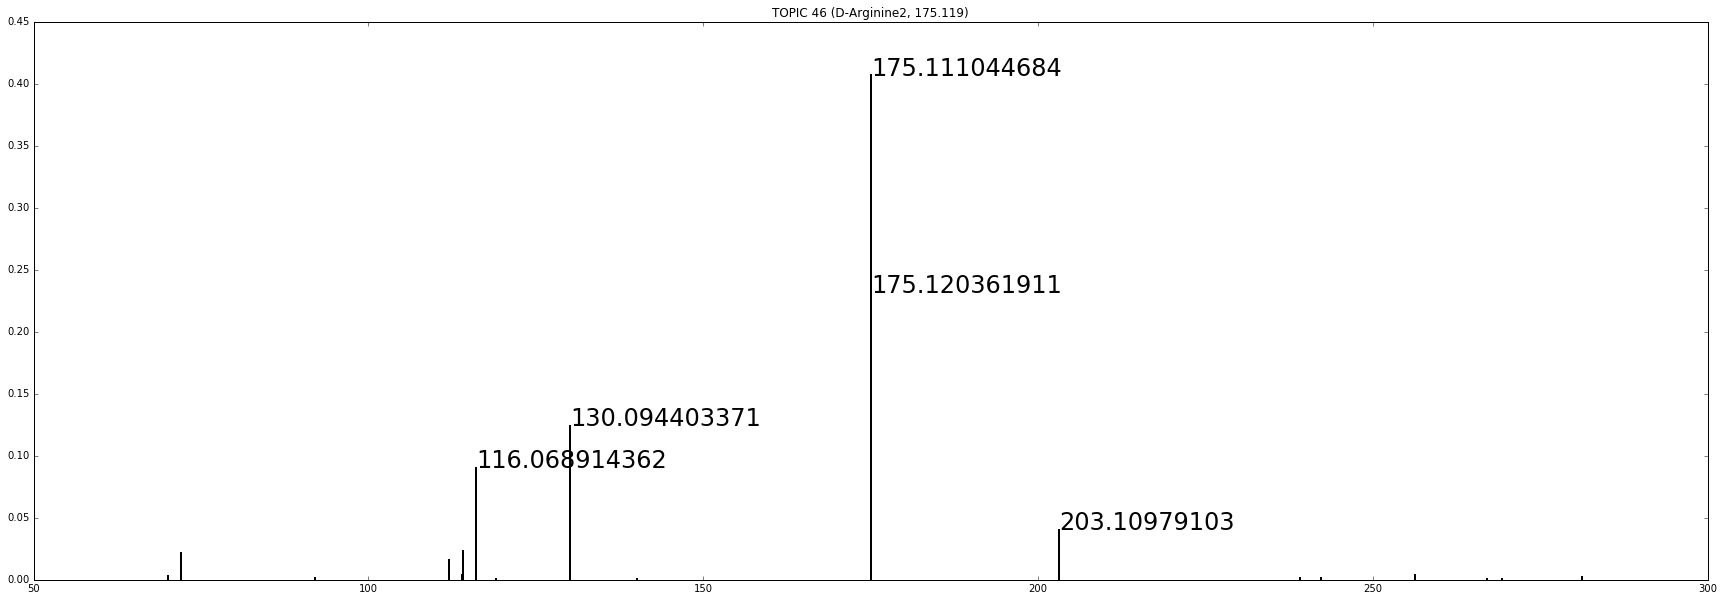

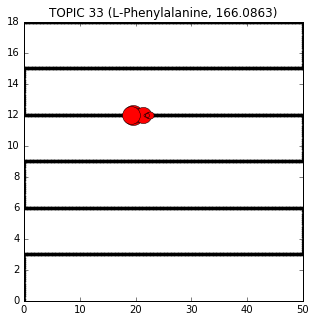

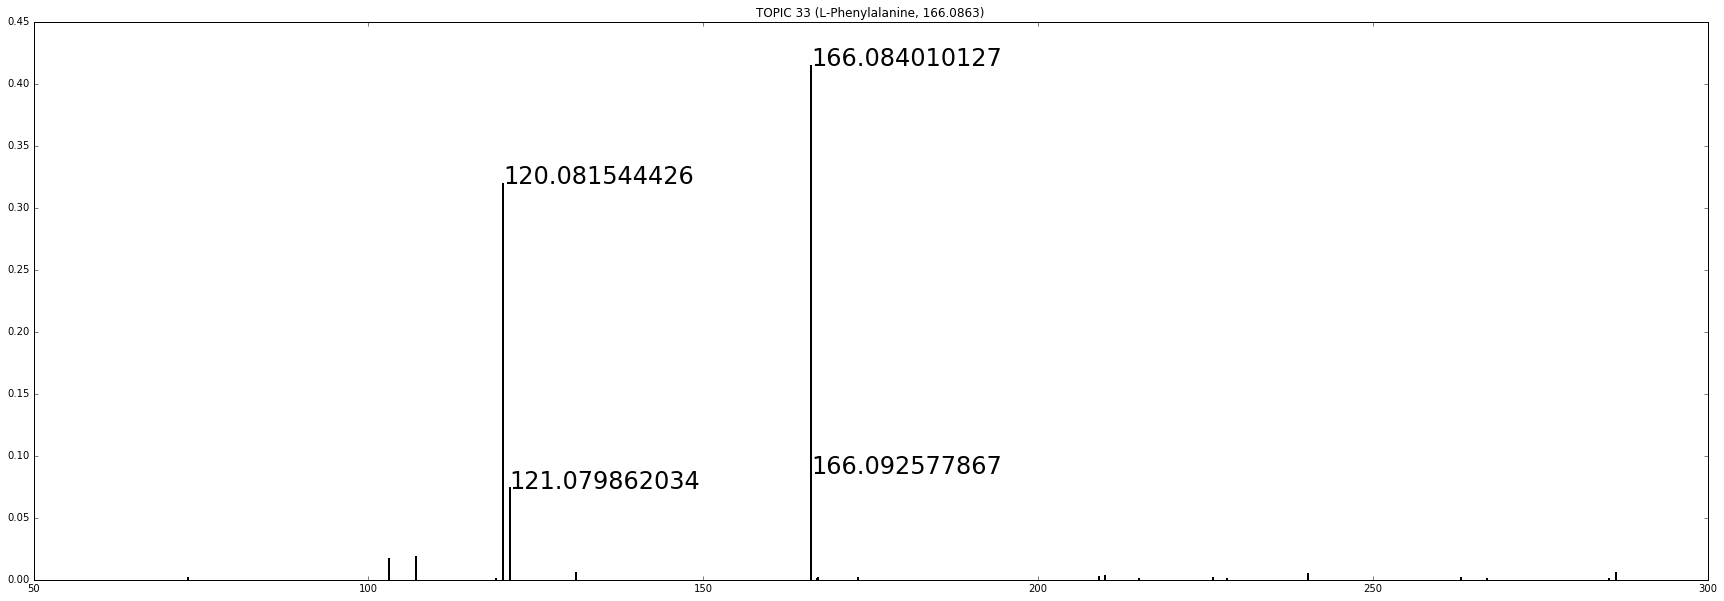

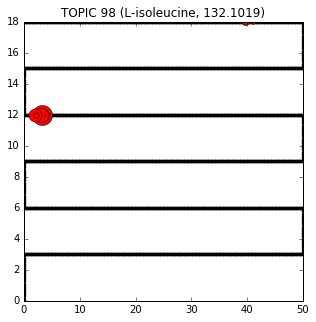

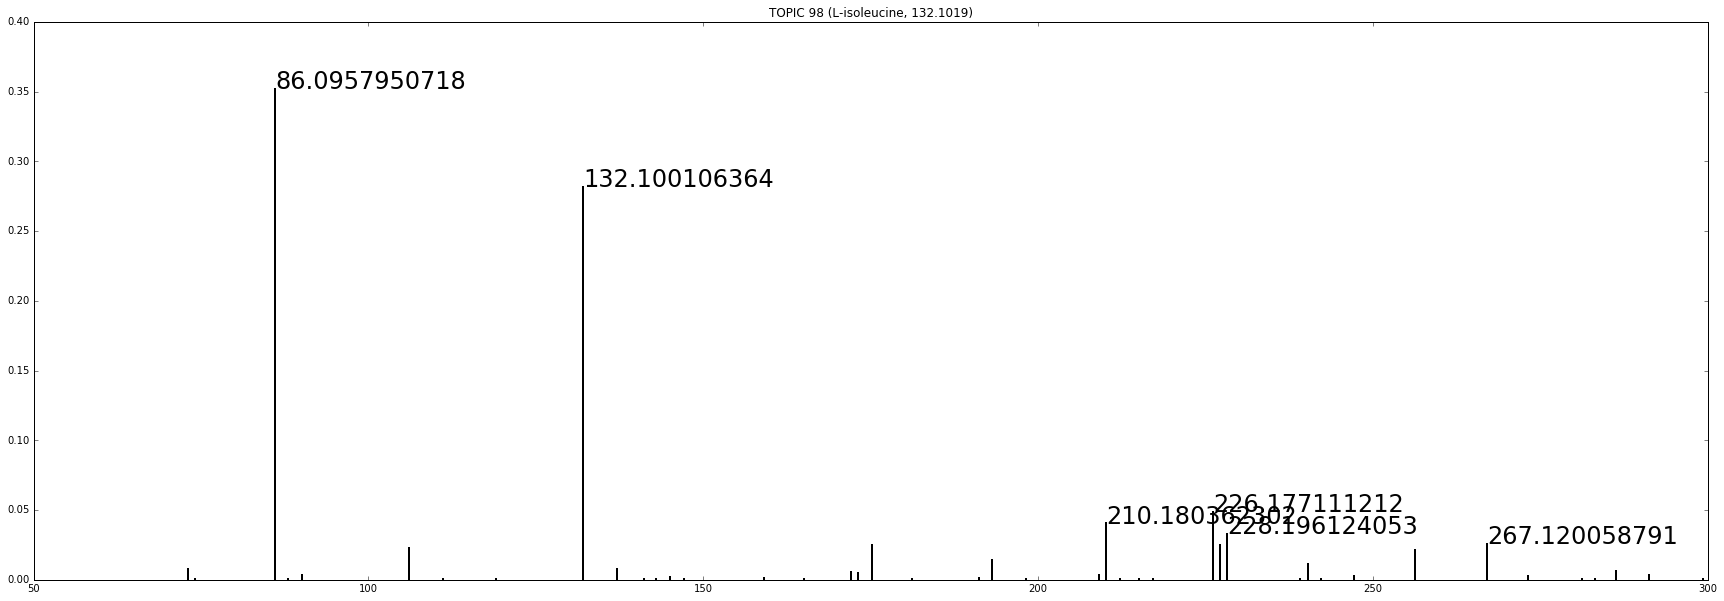

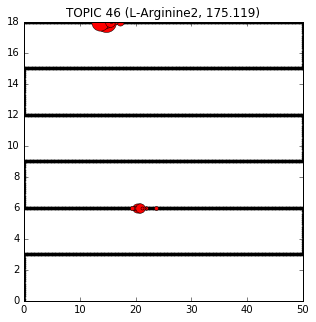

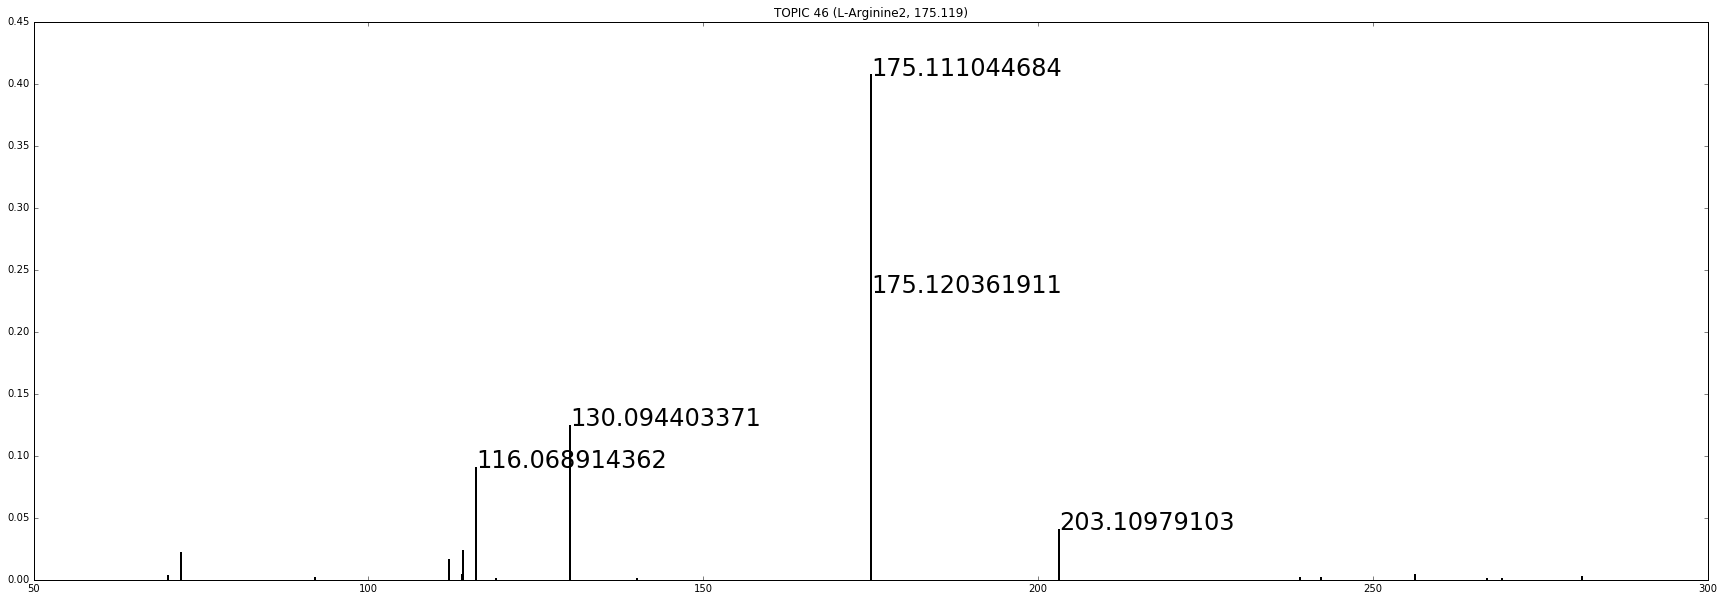

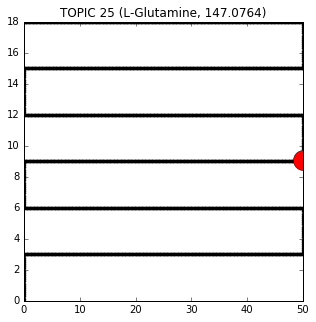

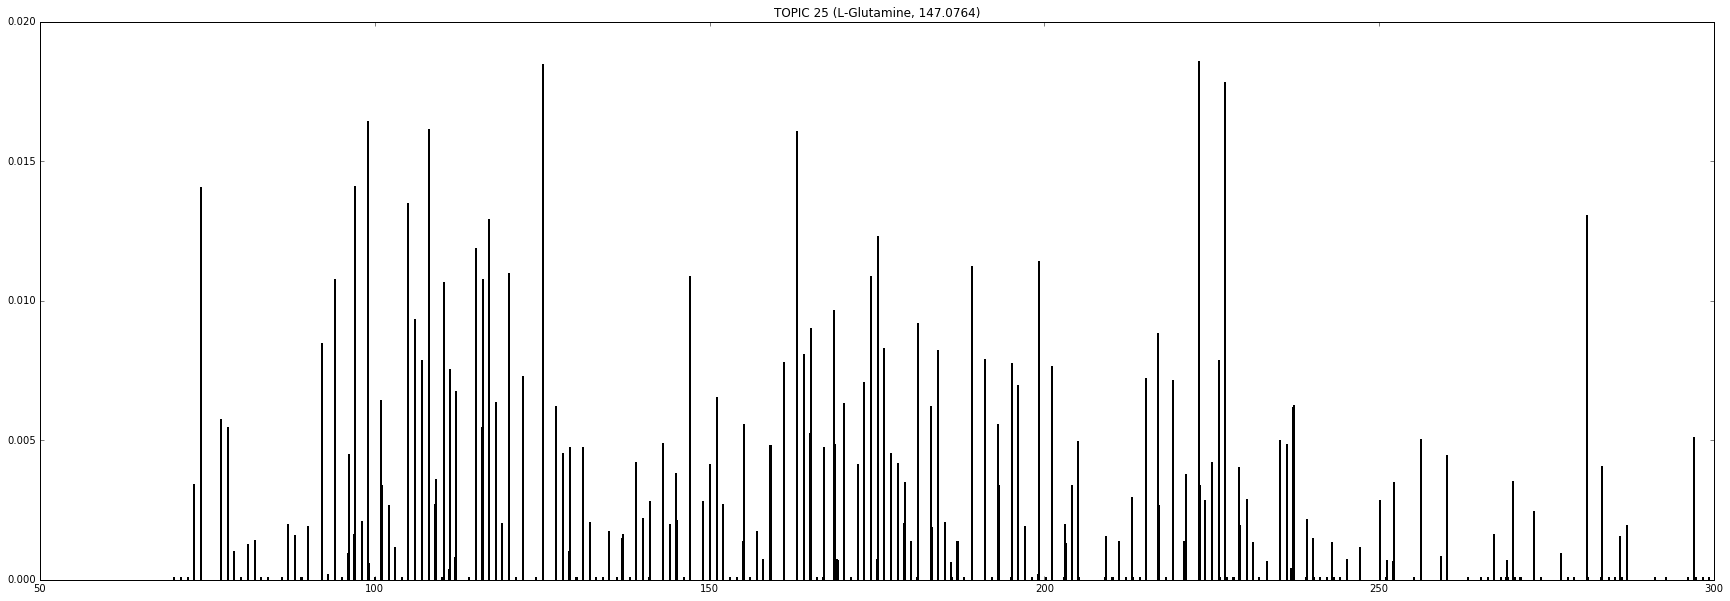

In [102]:
from ink_functions import plot_topic_dict
for a in best_topics:
    topic_of_interest = best_topics[a]
#     print
#     print
#     print "TOPIC {}".format(topic_of_interest)
    ig.plot(vals=v_lda.get_topic_as_doc_dict(topic_of_interest),figsize=(5,5),max_marker_size=20)
    plt.title('TOPIC {} ({}, {})'.format(topic_of_interest,a,amino_acids[a]))
    plot_topic_dict(v_lda.get_topic_as_dict(topic_of_interest),label_thresh=0.025)
    plt.title('TOPIC {} ({}, {})'.format(topic_of_interest,a,amino_acids[a]))
    

In [ ]:
x_min = [0,6,12,18,24,30,36,42]
x_max = [6,12,18,24,30,36,42,48]
y_min = [5,11,17]
y_max = [7,13,19]
ok_docs = {}
prop = {}
eth = v_lda.get_expect_theta()
for i,xmi in enumerate(x_min):
    for j,ymi in enumerate(y_min):
        xma = x_max[i]
        yma = y_max[j]
        ok_docs[(i,j)] = []
        for k,x in enumerate(ig.colcoord):
            y = ig.rowcoord[k]
            if x >= xmi and x <= xma and y >= ymi and y <= yma:
                ok_docs[(i,j)].append(str(k))
            total_theta = eth.sum(axis=0)
            ok_theta = np.zeros_like(total_theta)
            for d in ok_docs[(i,j)]:
                if d in v_lda.doc_index:
                    pos = v_lda.doc_index[d]
                    ok_theta += eth[pos,:]
            prop[(i,j)] = ok_theta / total_theta



In [128]:
ground_truth = {(0,2):'L-Aspartic Acid',(1,2):'L-Methionine',(2,2):'L-Arginine',(3,2):'L-Asparagine',(4,2):'L-Cysteine',(5,2):'L-Glutamic Acid',(6,2):'L-Threonine',(7,2):'L-isoleucine',
    (0,1):'L-Leucine',(1,1):'Glycine',(2,1):'L-Ornithine',(3,1):'L-Phenylalanine',(4,1):'L-Proline',(5,1):'L-Serine',(6,1):'L-Tryptophan',(7,1):'Hydroxy-L-Proline',
    (0,0):'L-Homoserine',(1,0):'L-Glutamine',(2,0):'L-Alanine',(3,0):'L-Arginine2',(4,0):'L-Histidine',(5,0):'Glycine',(6,0):'L-Valine'}

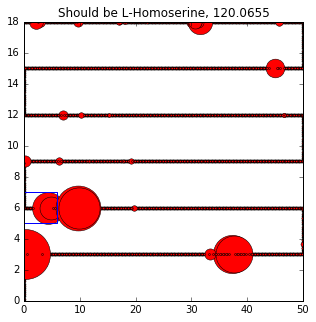

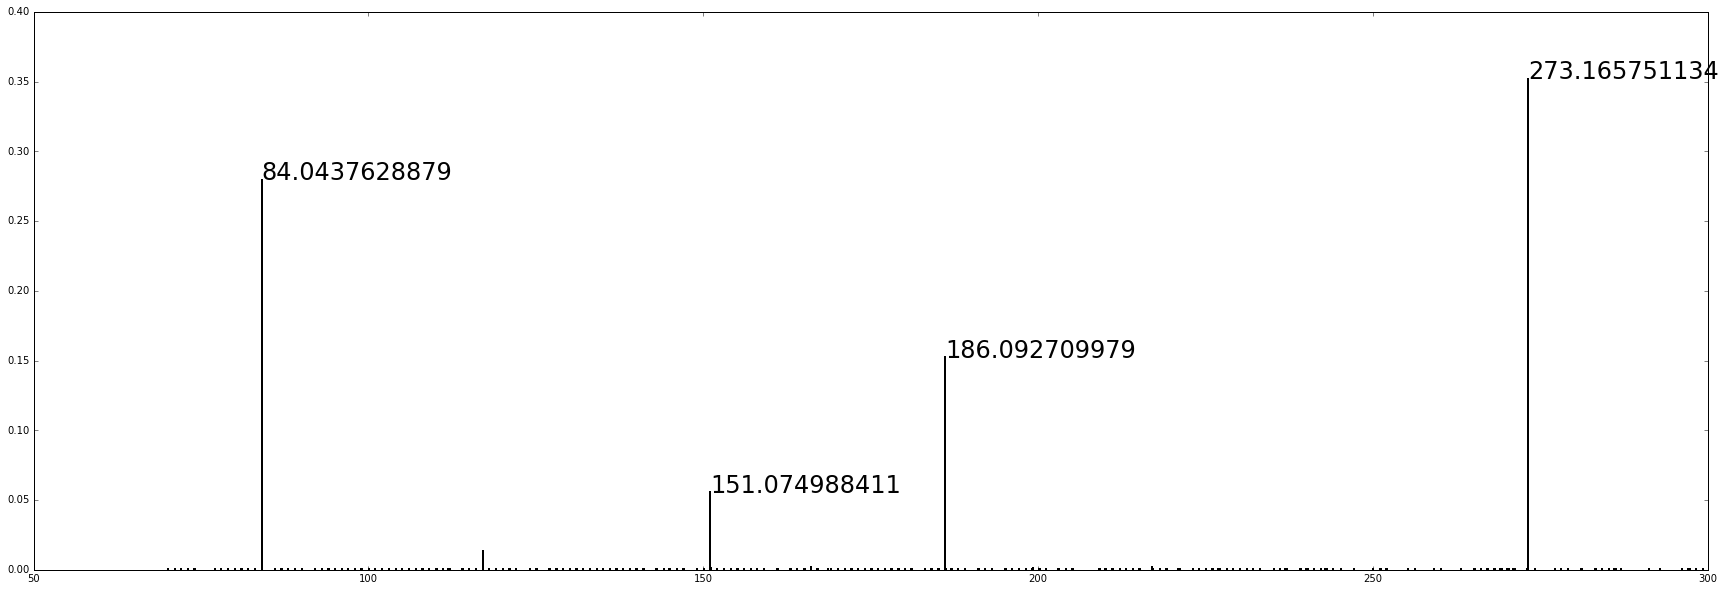

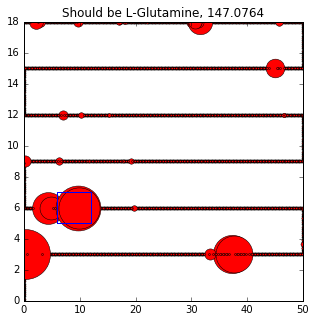

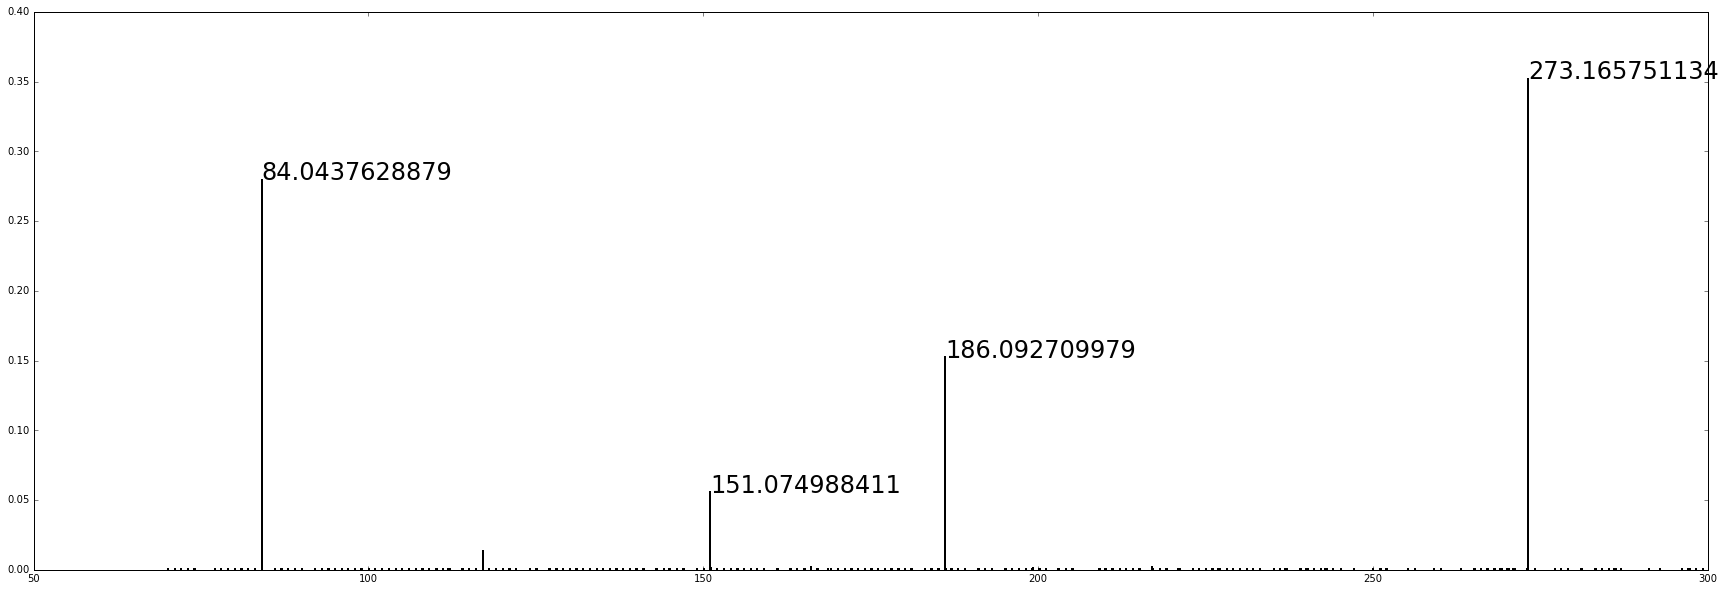

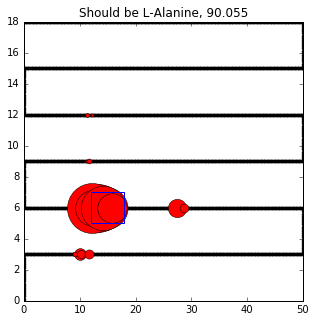

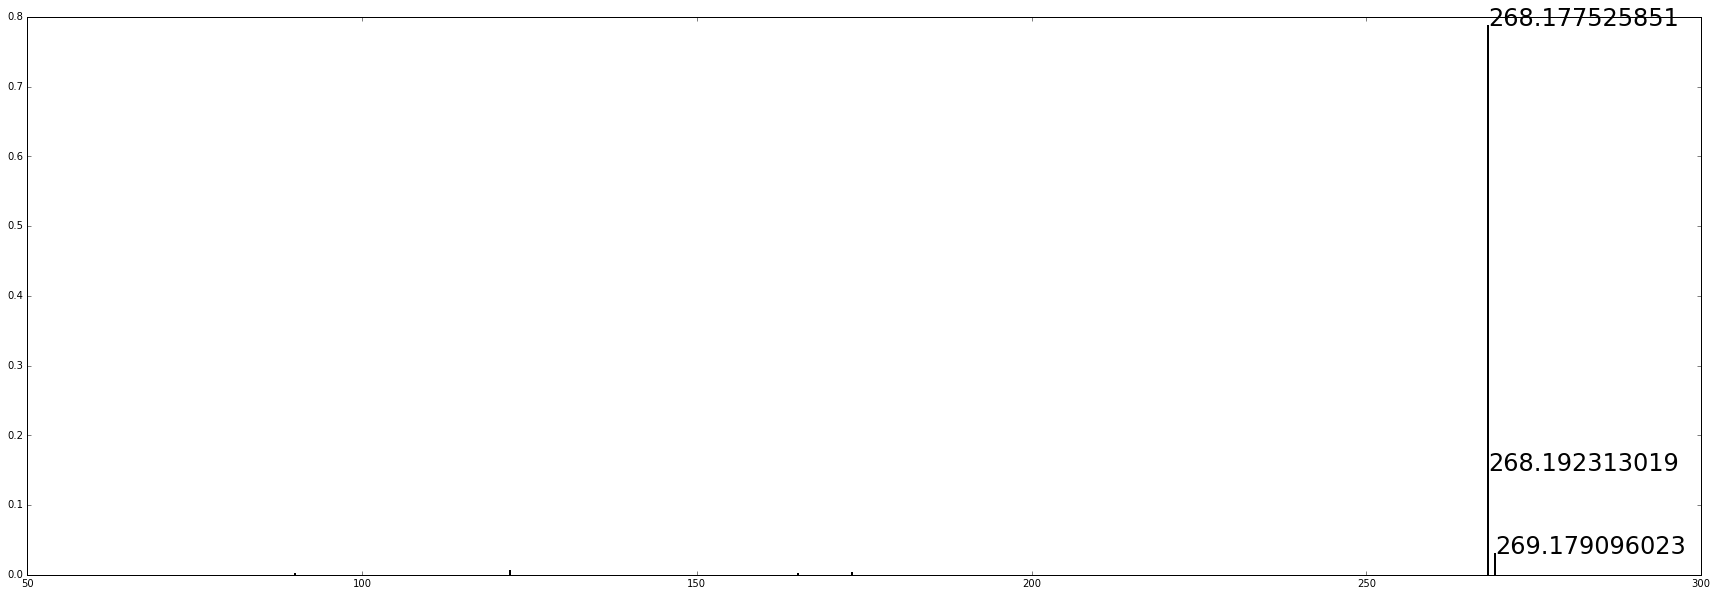

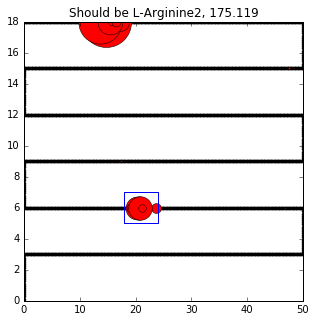

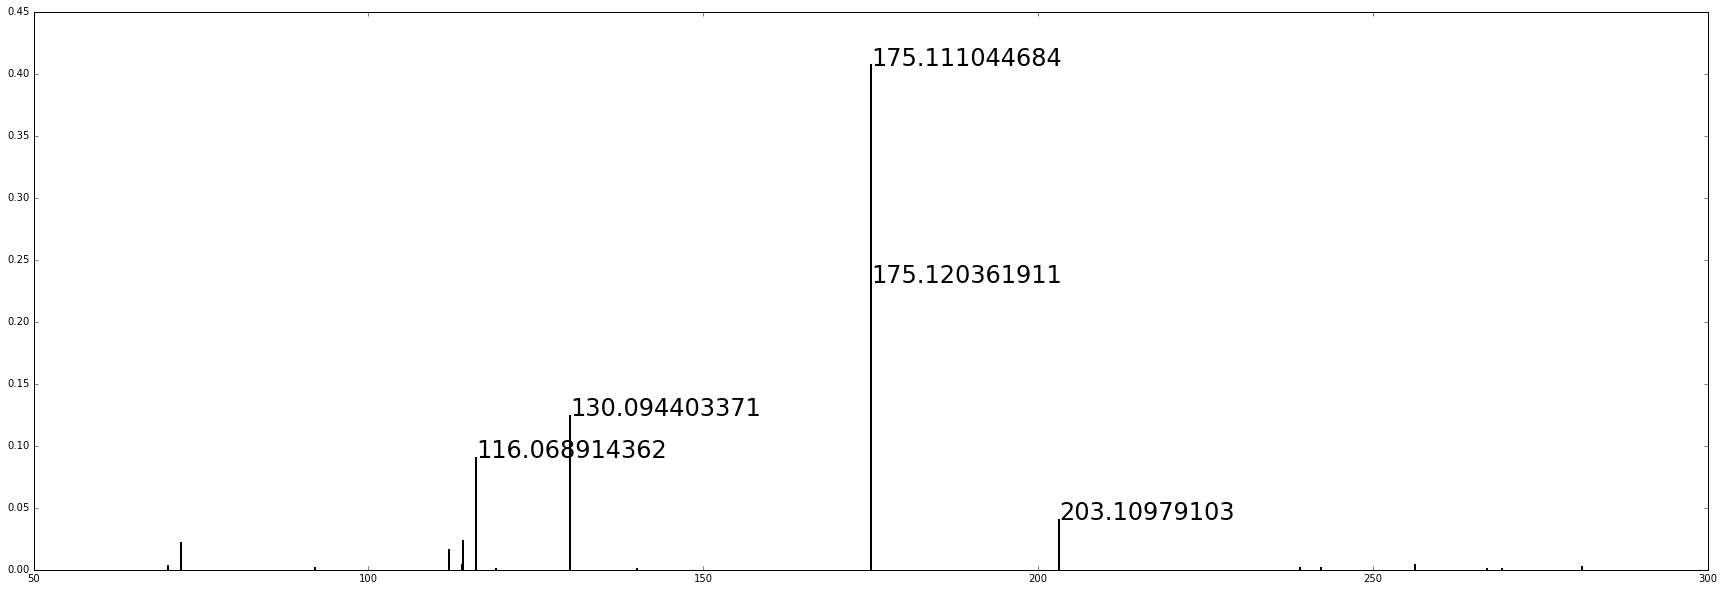

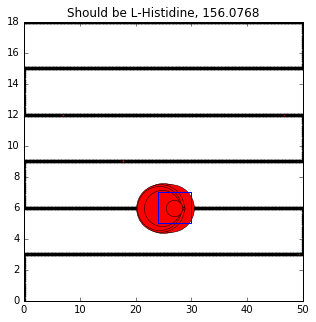

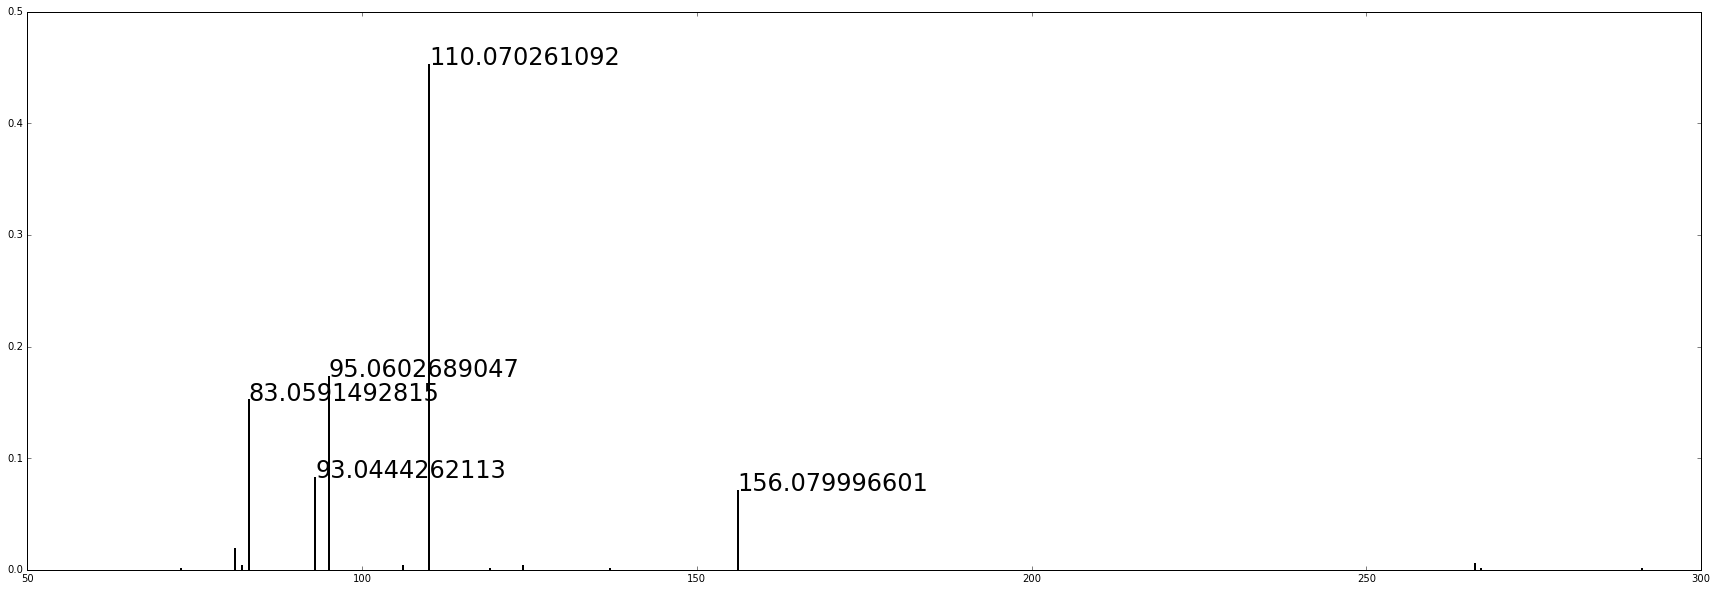

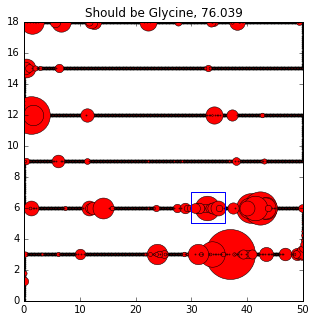

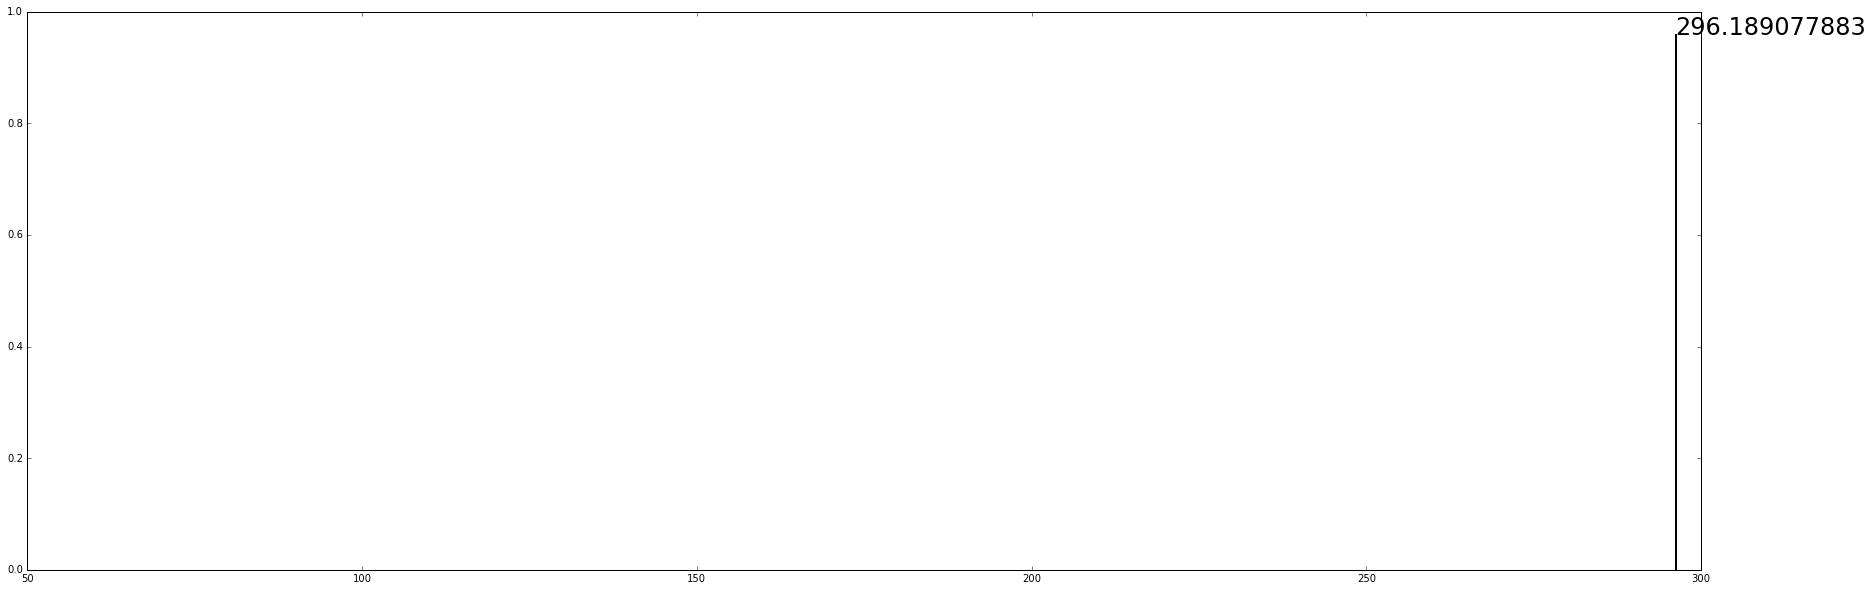

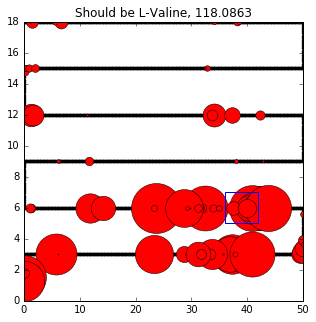

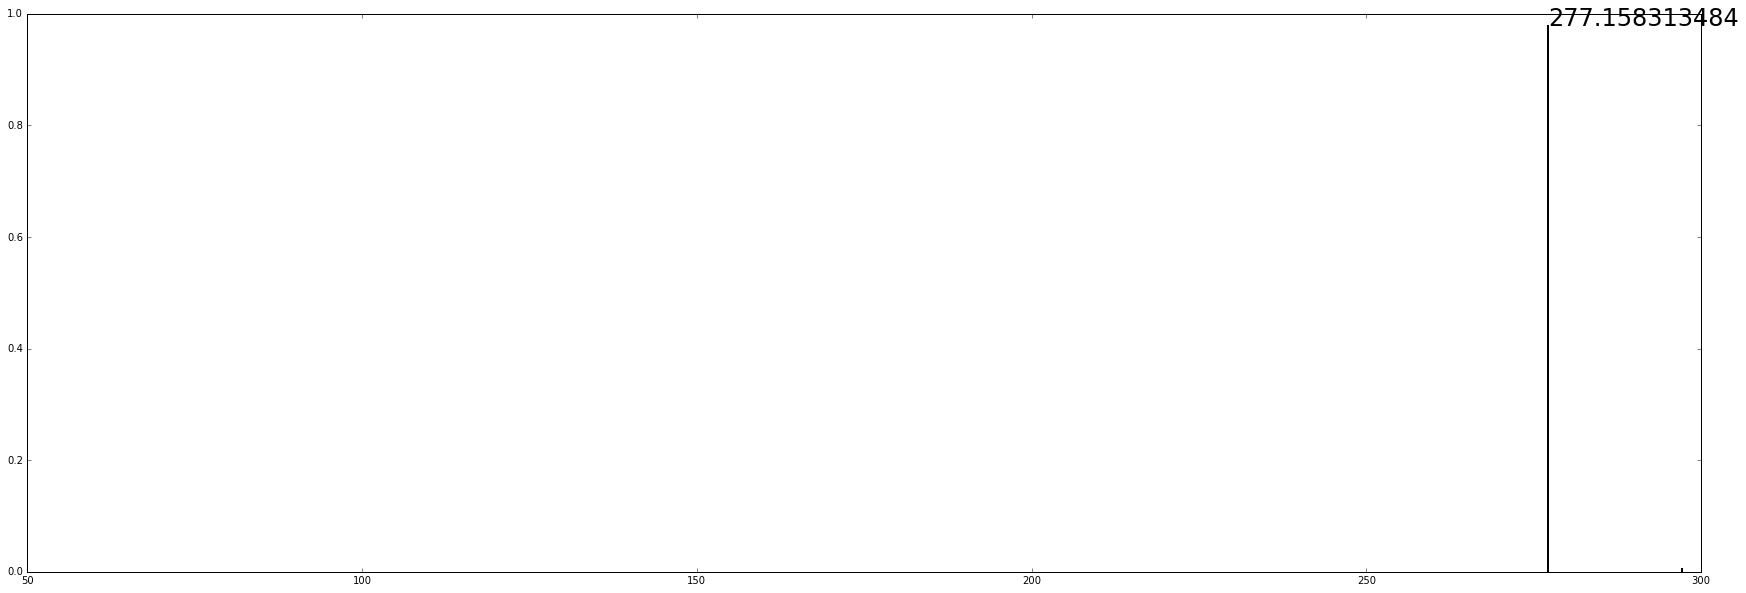

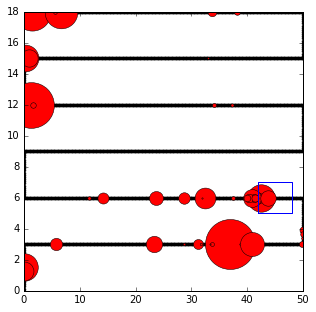

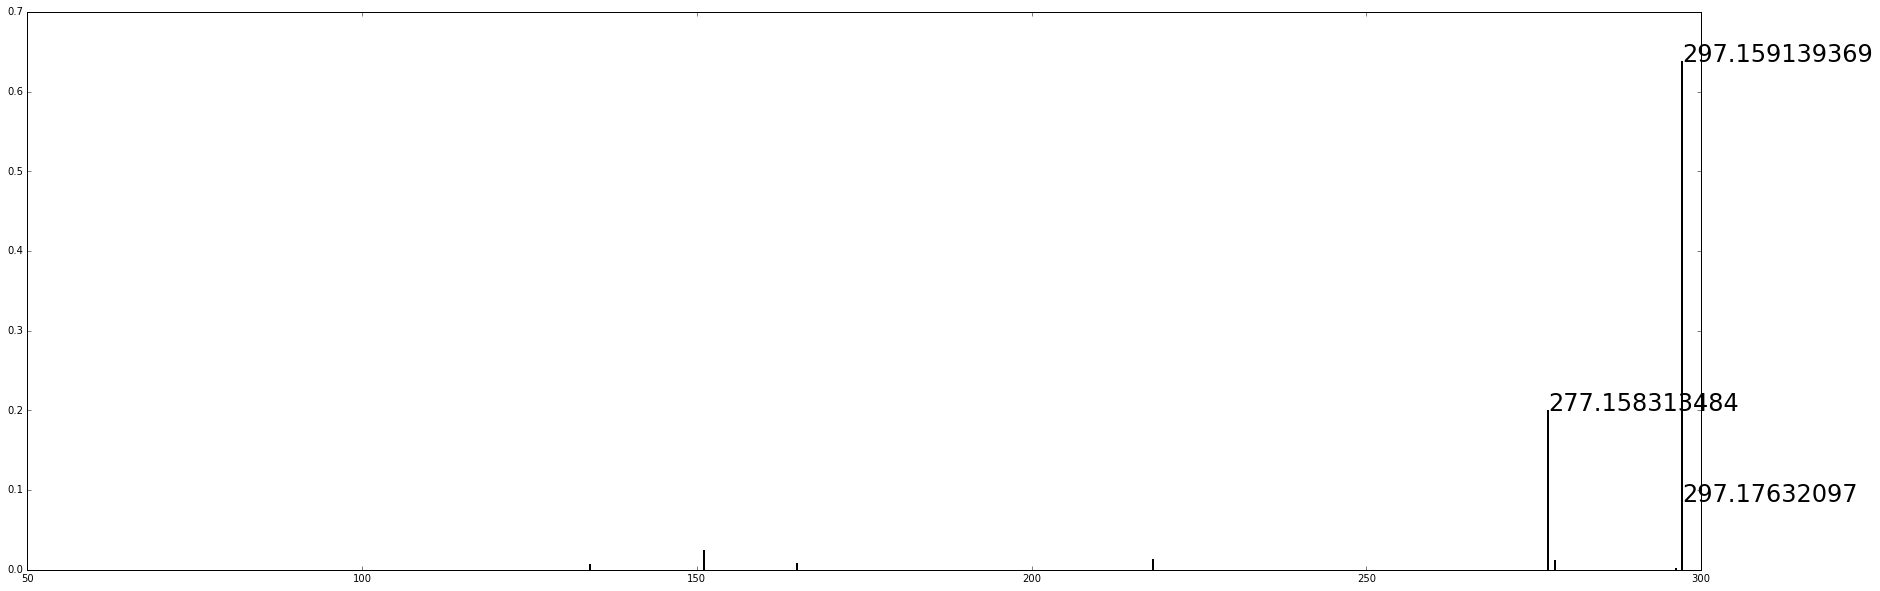

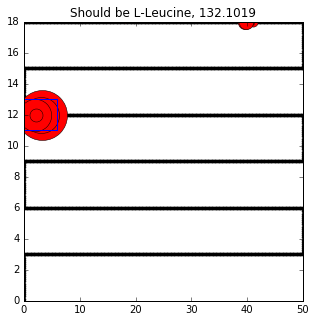

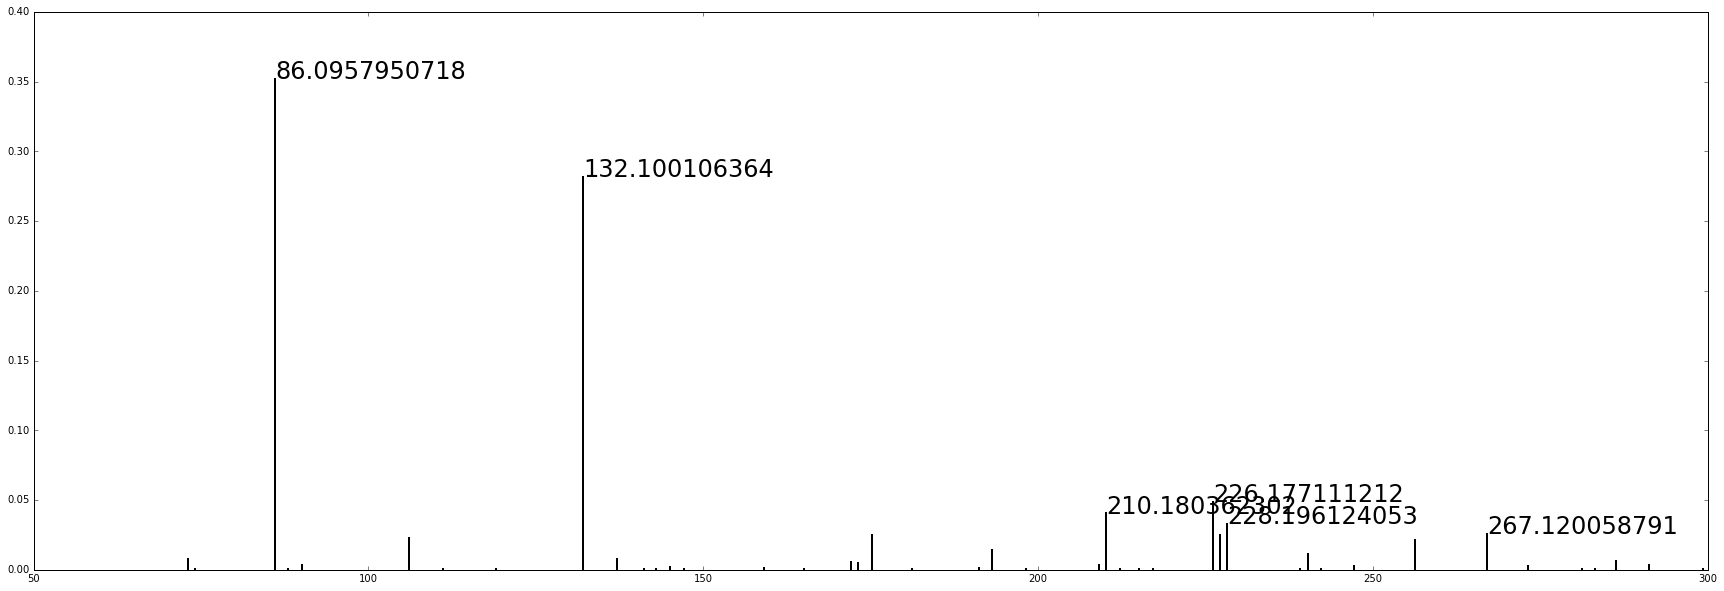

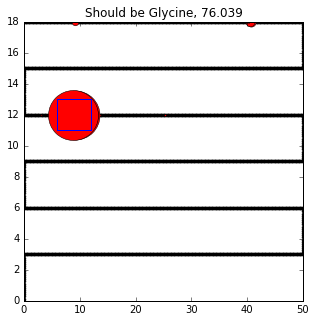

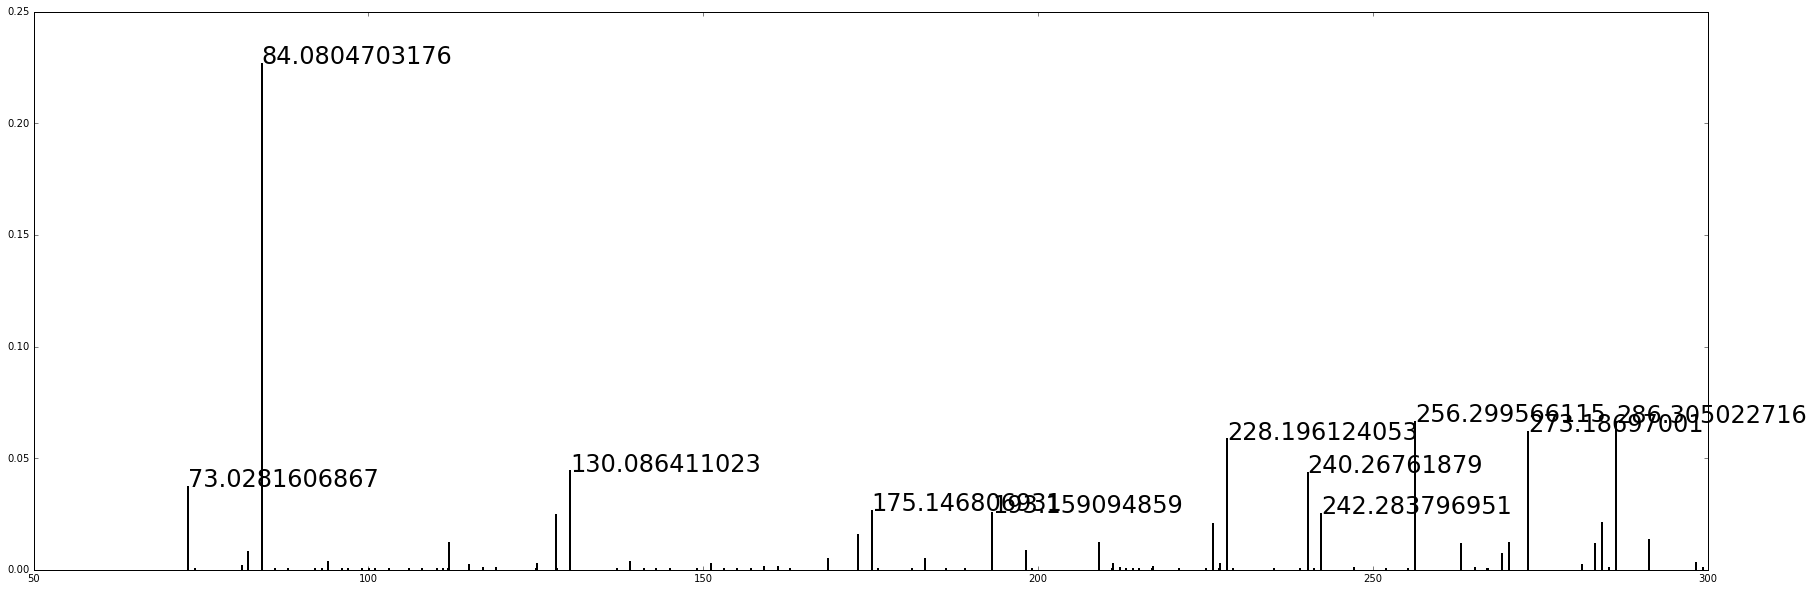

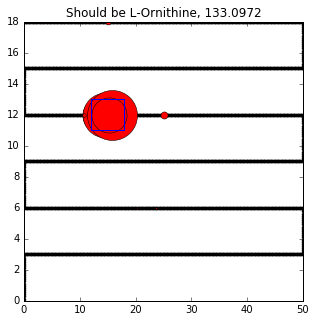

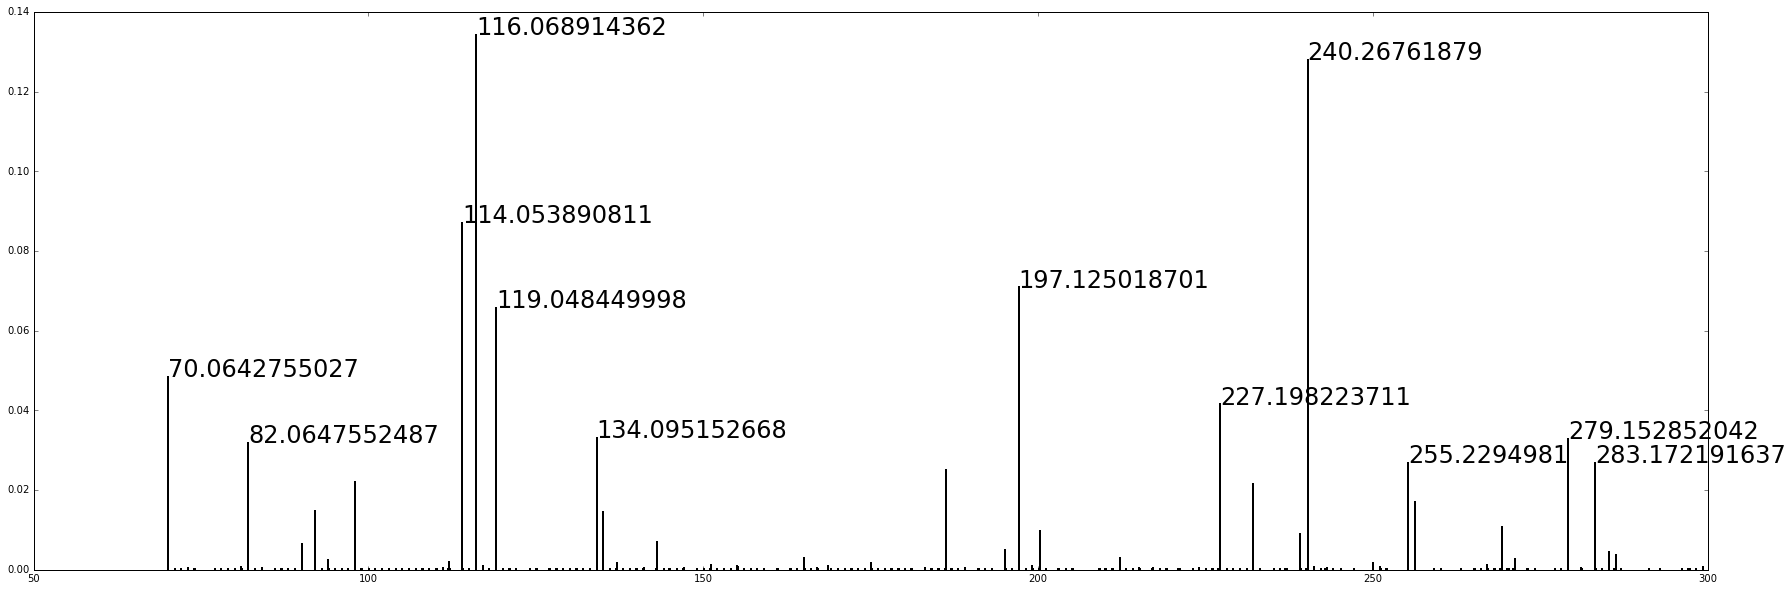

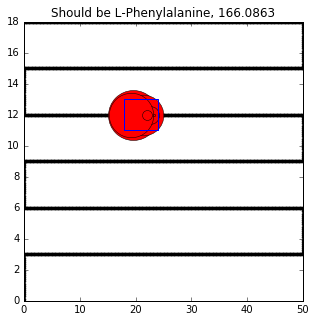

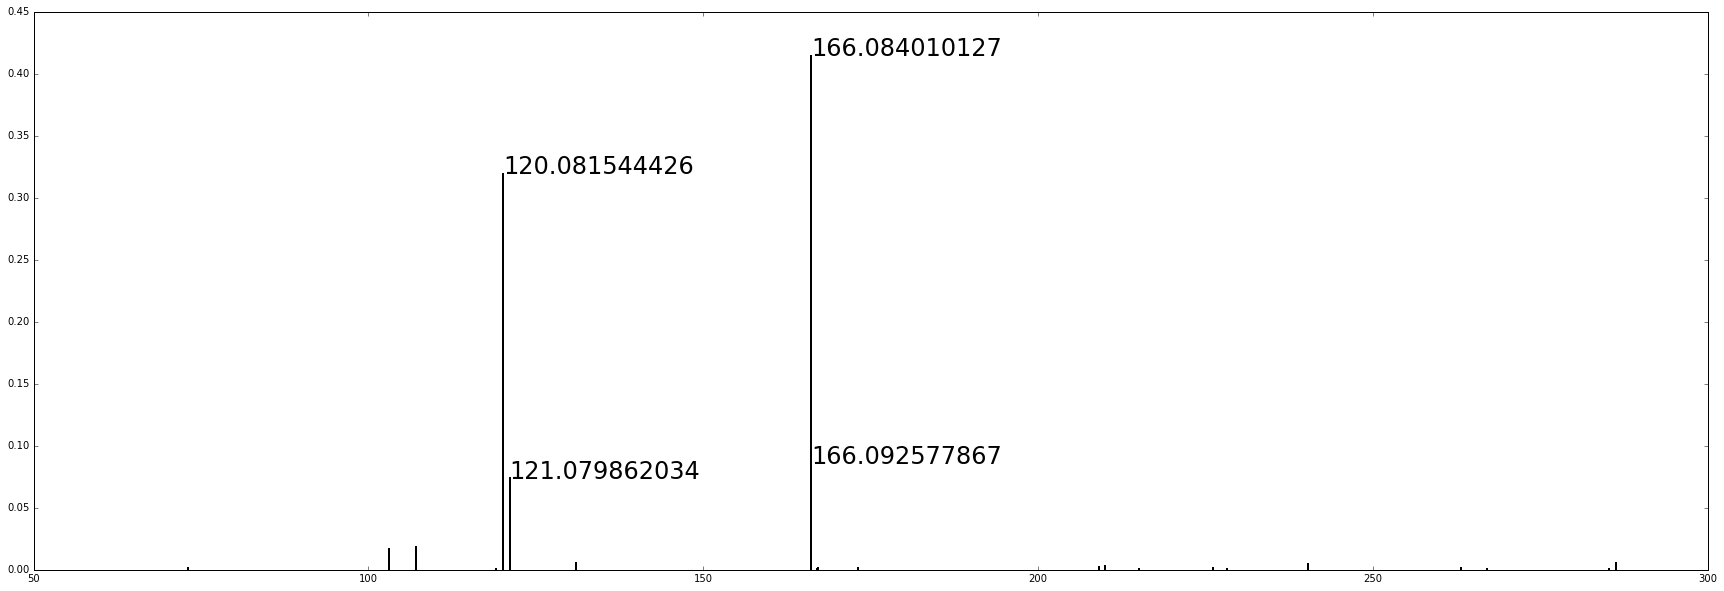

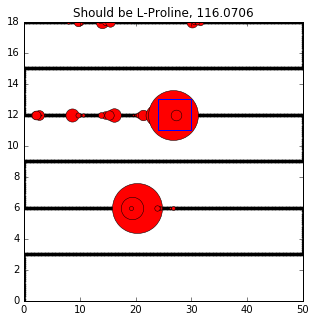

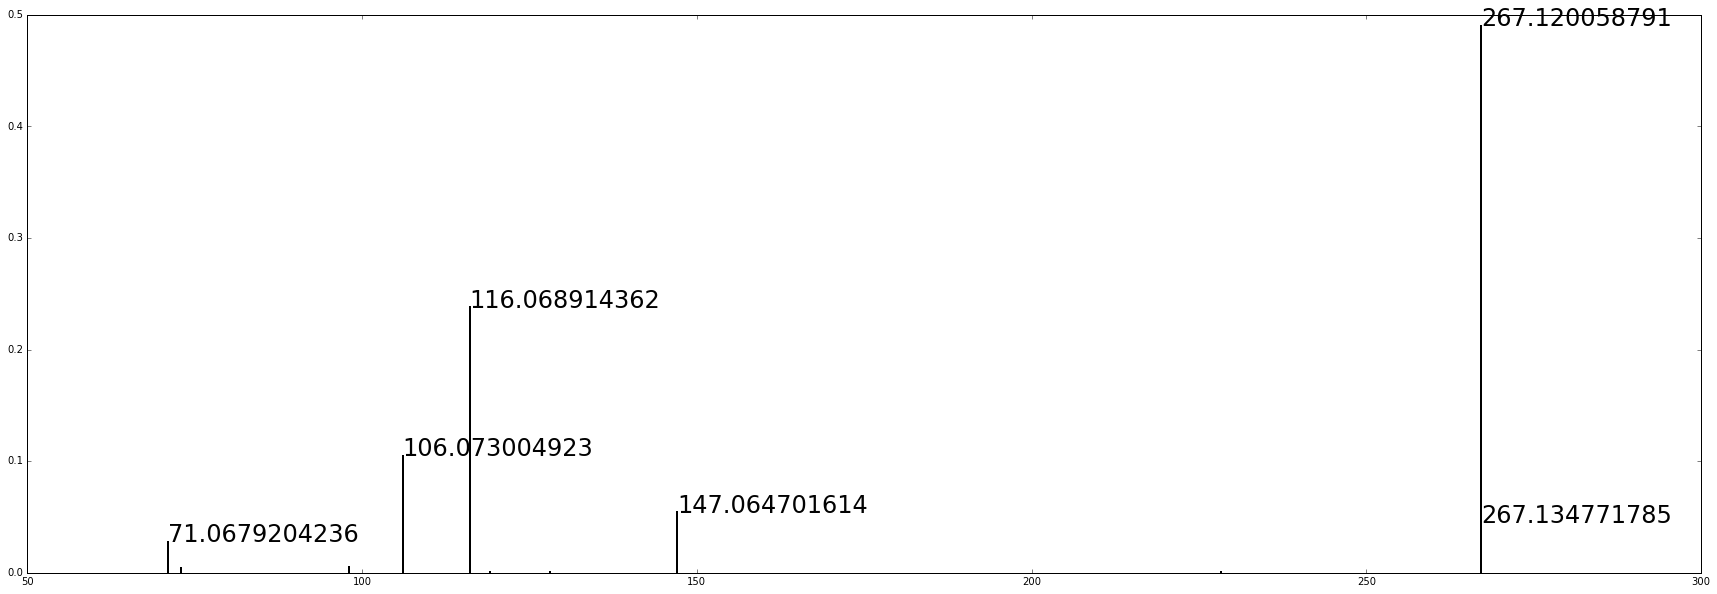

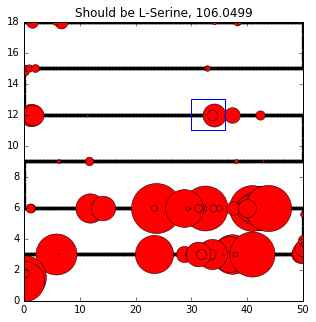

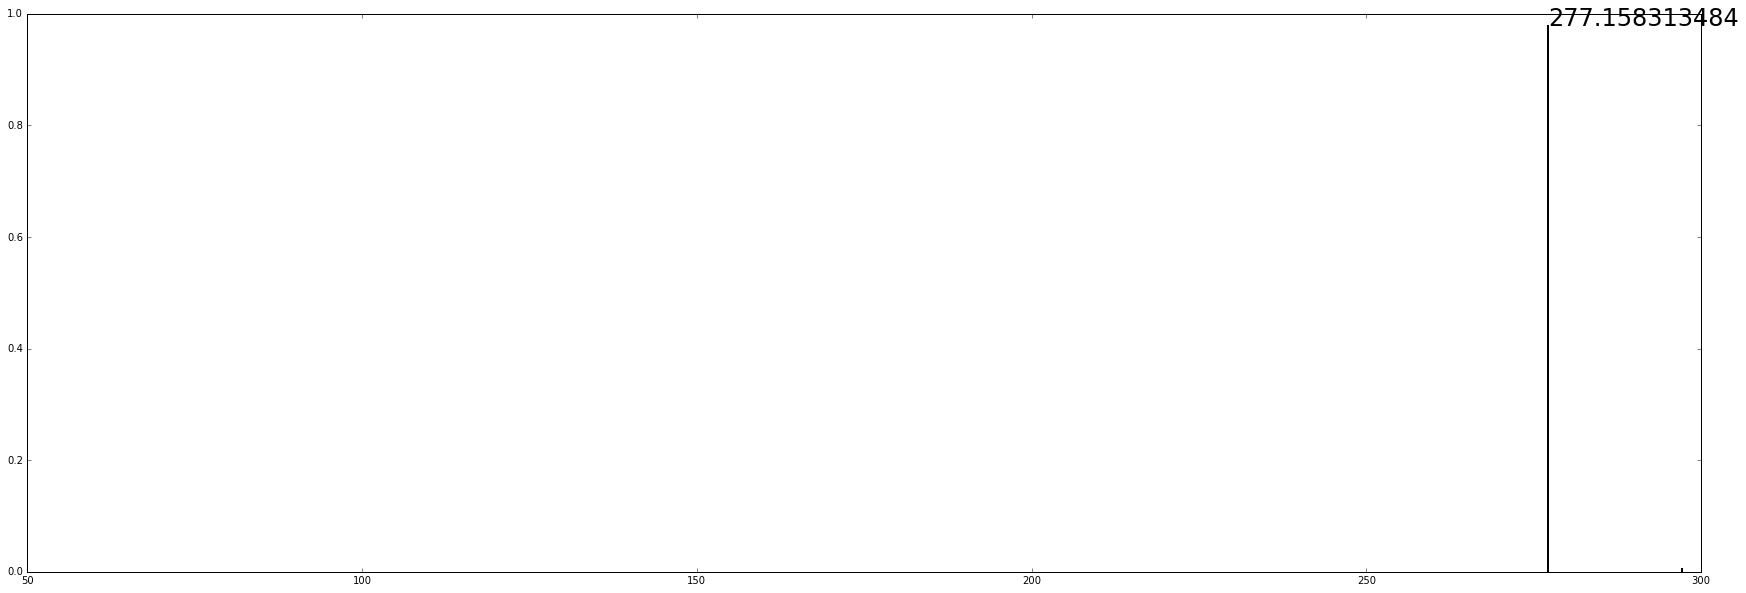

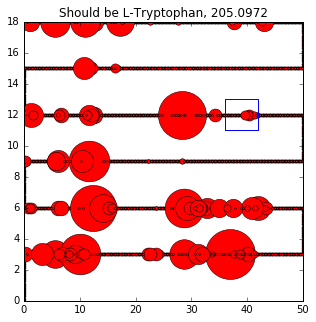

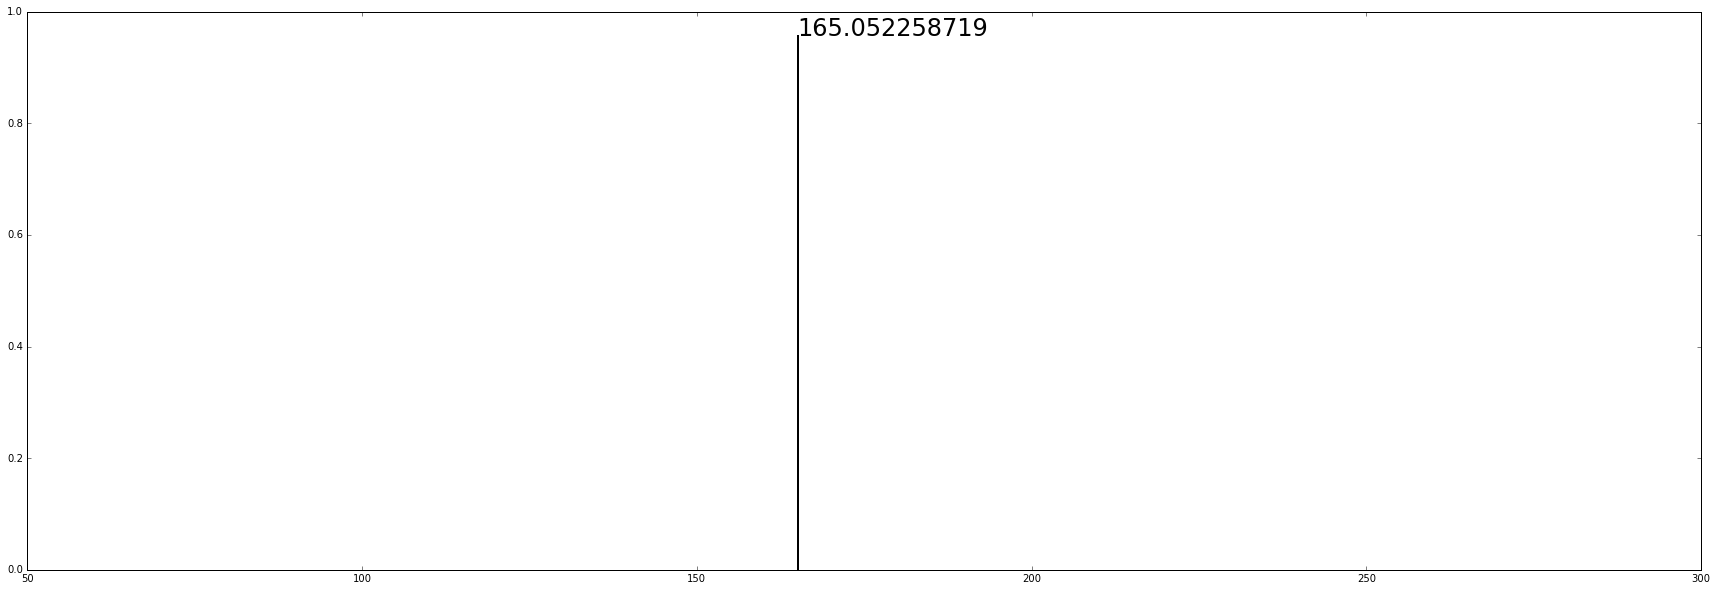

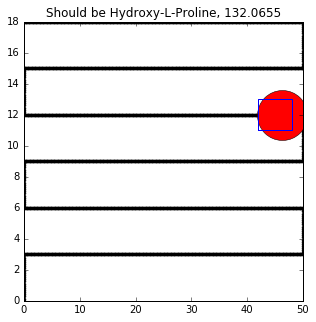

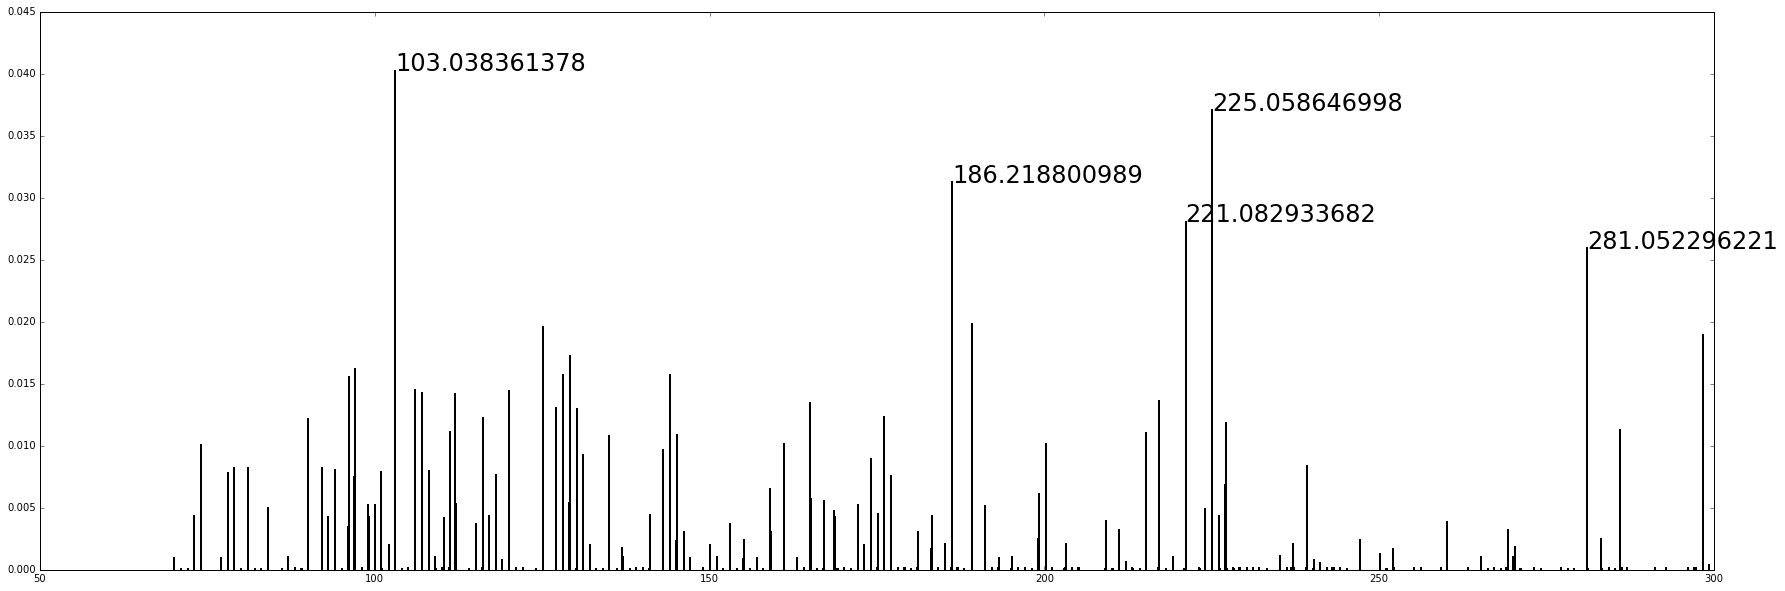

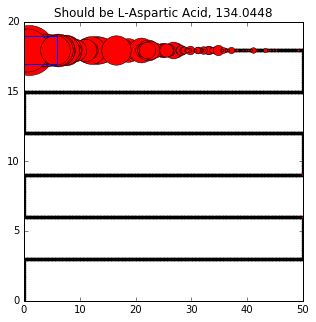

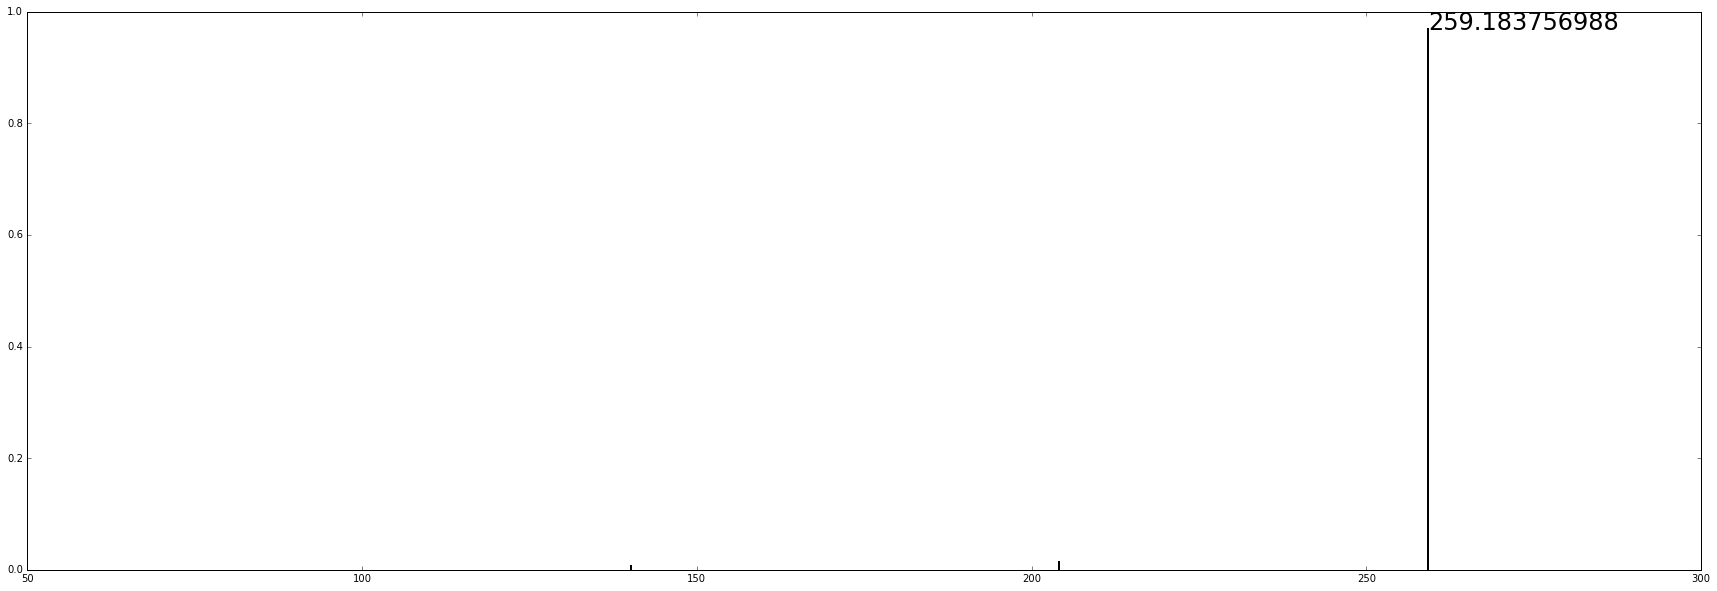

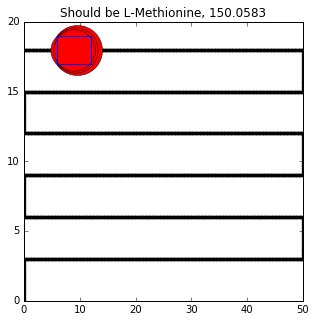

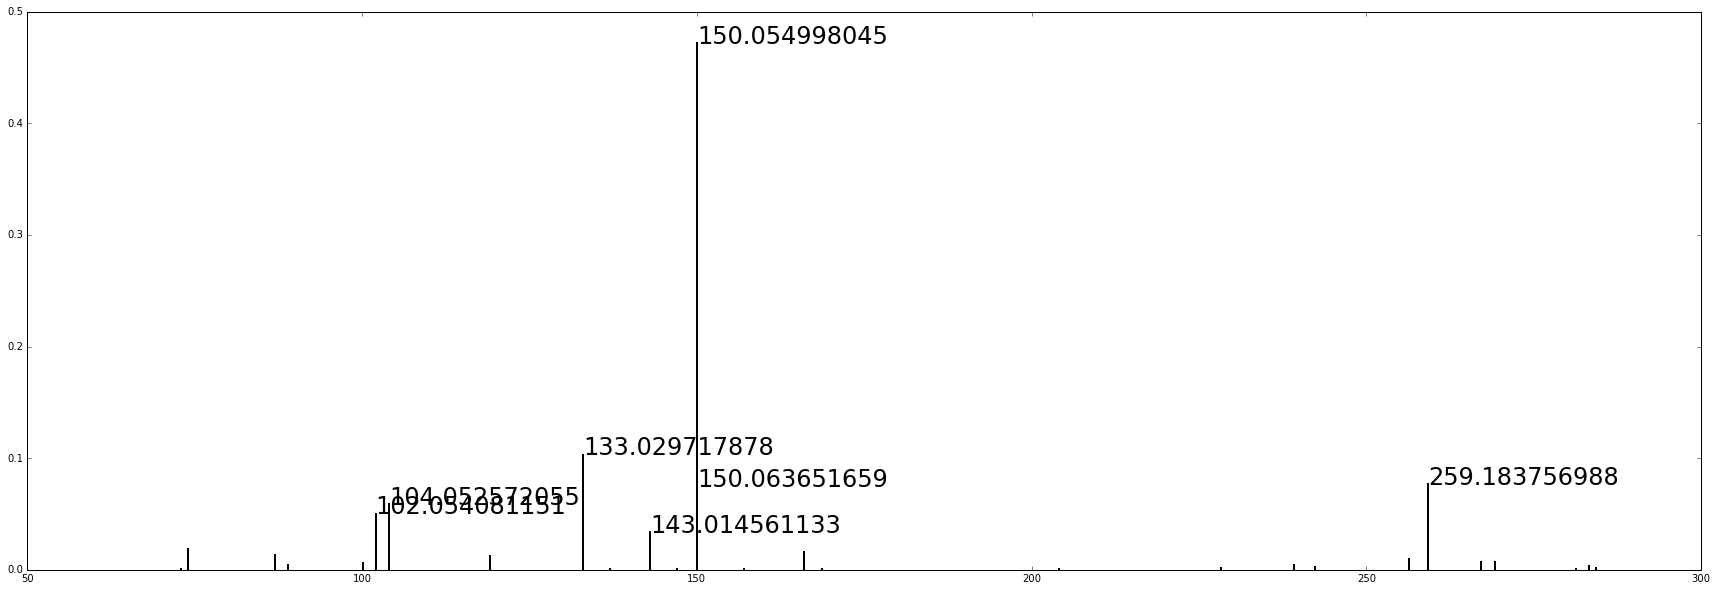

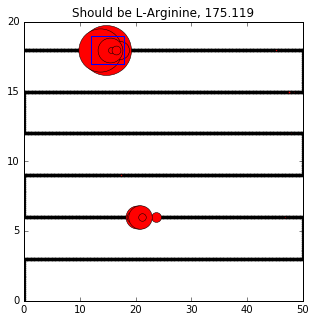

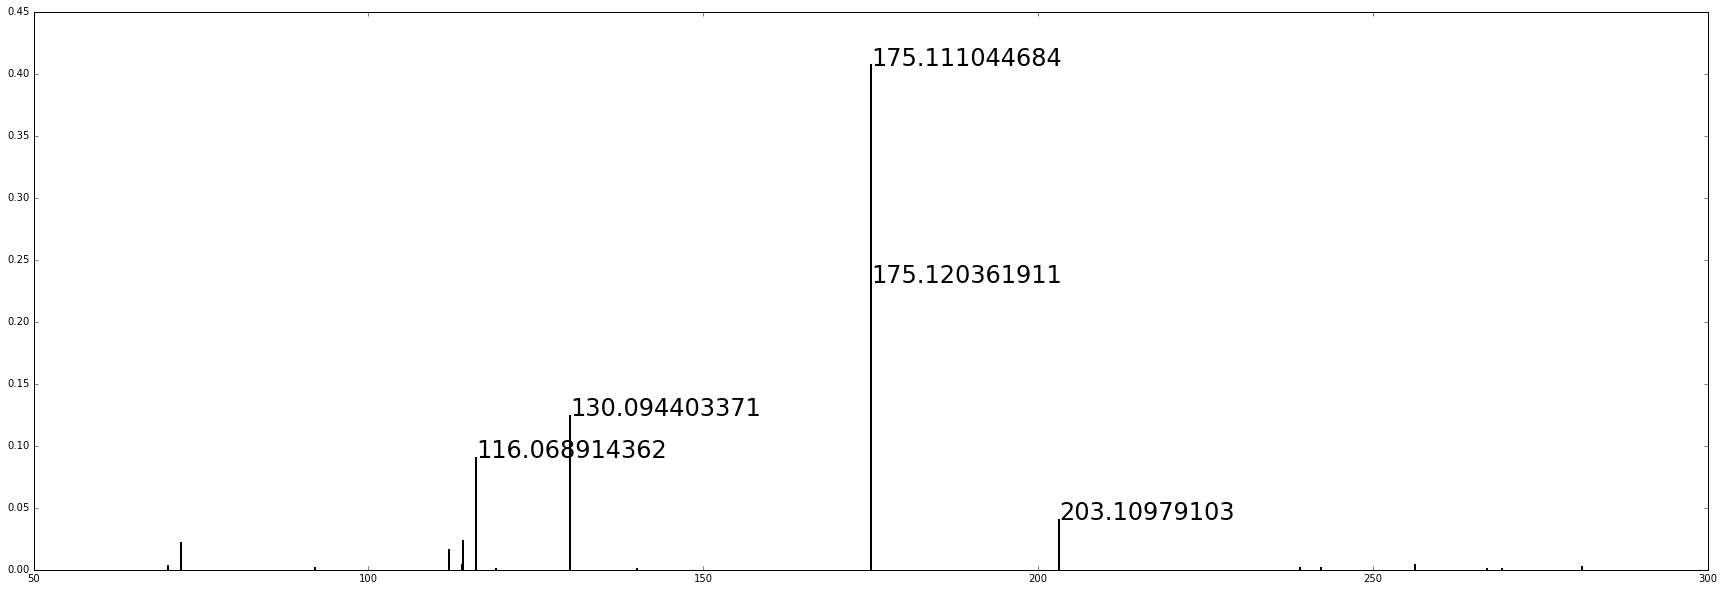

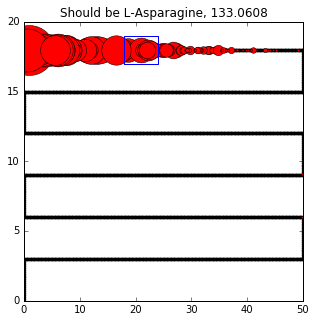

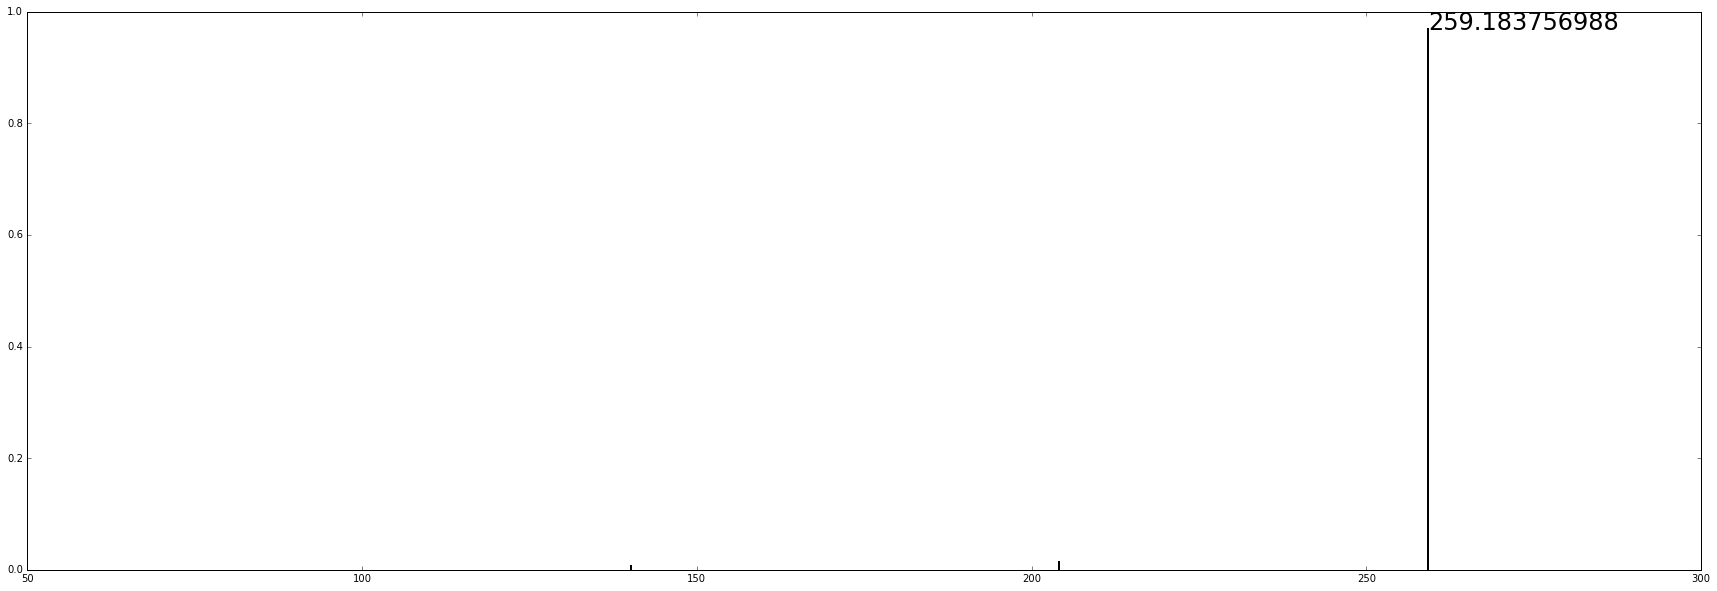

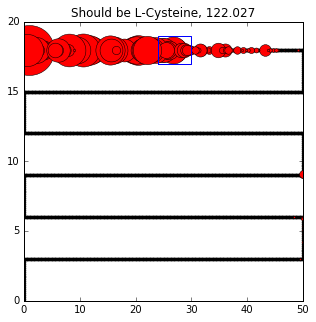

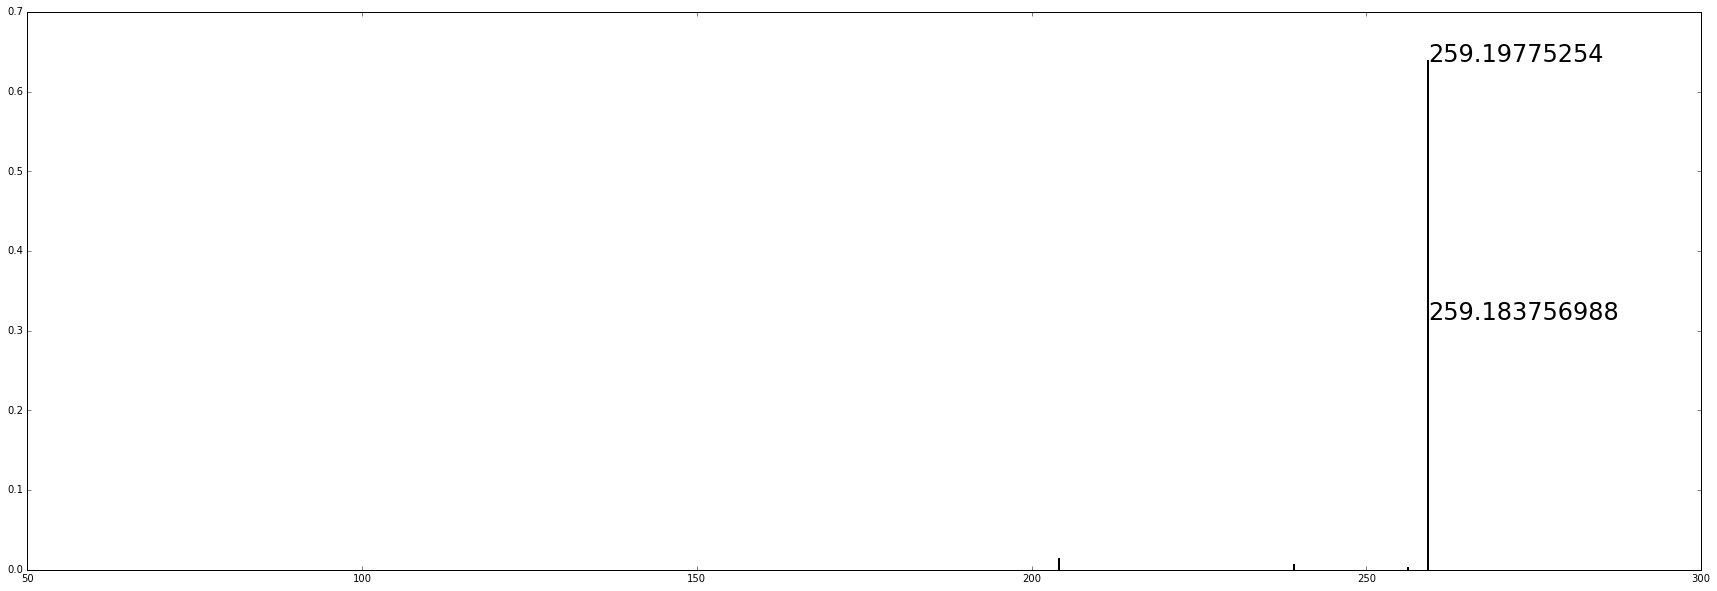

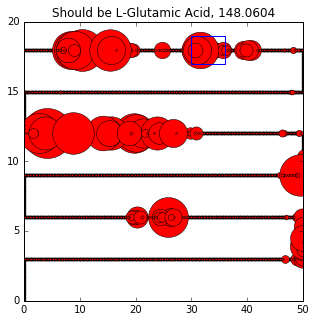

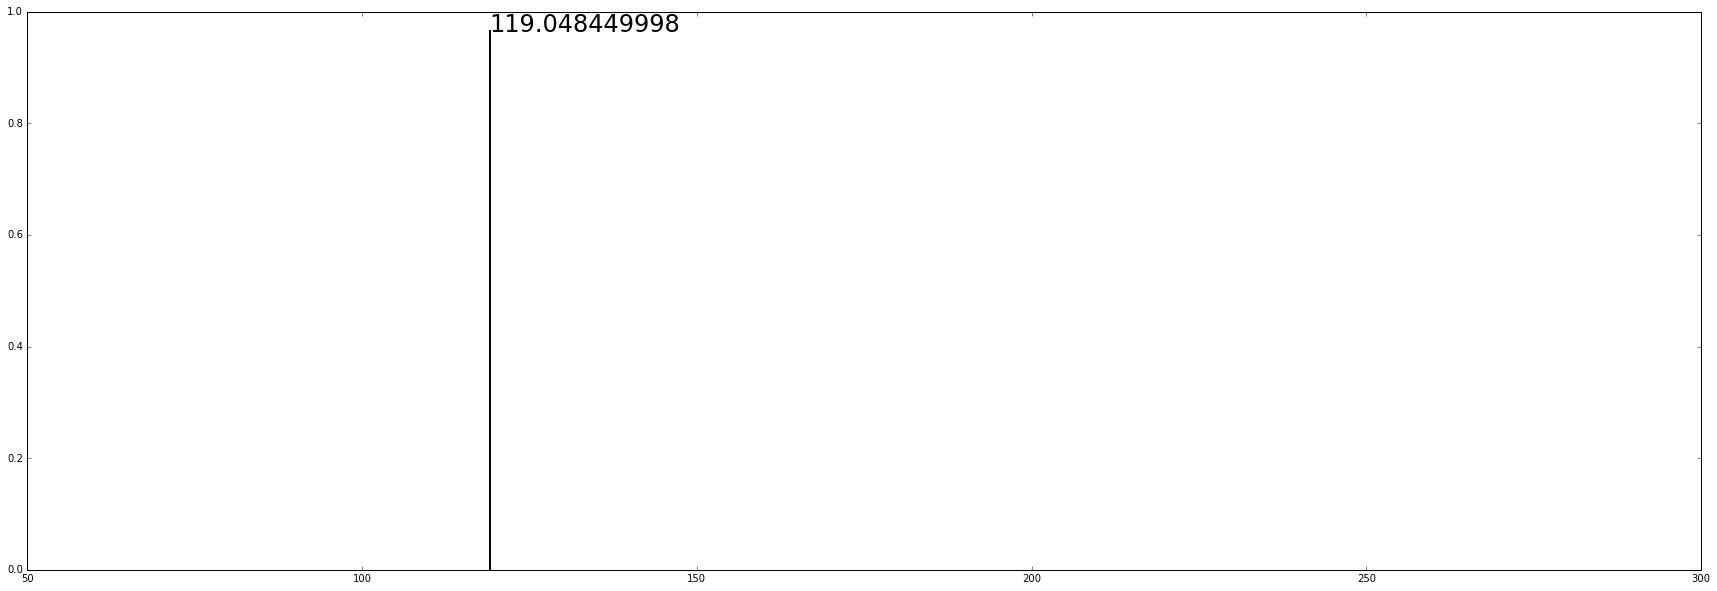

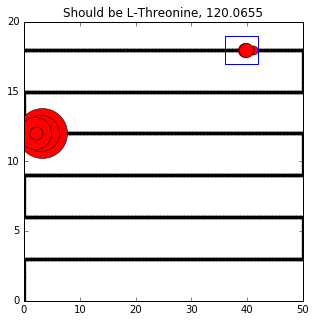

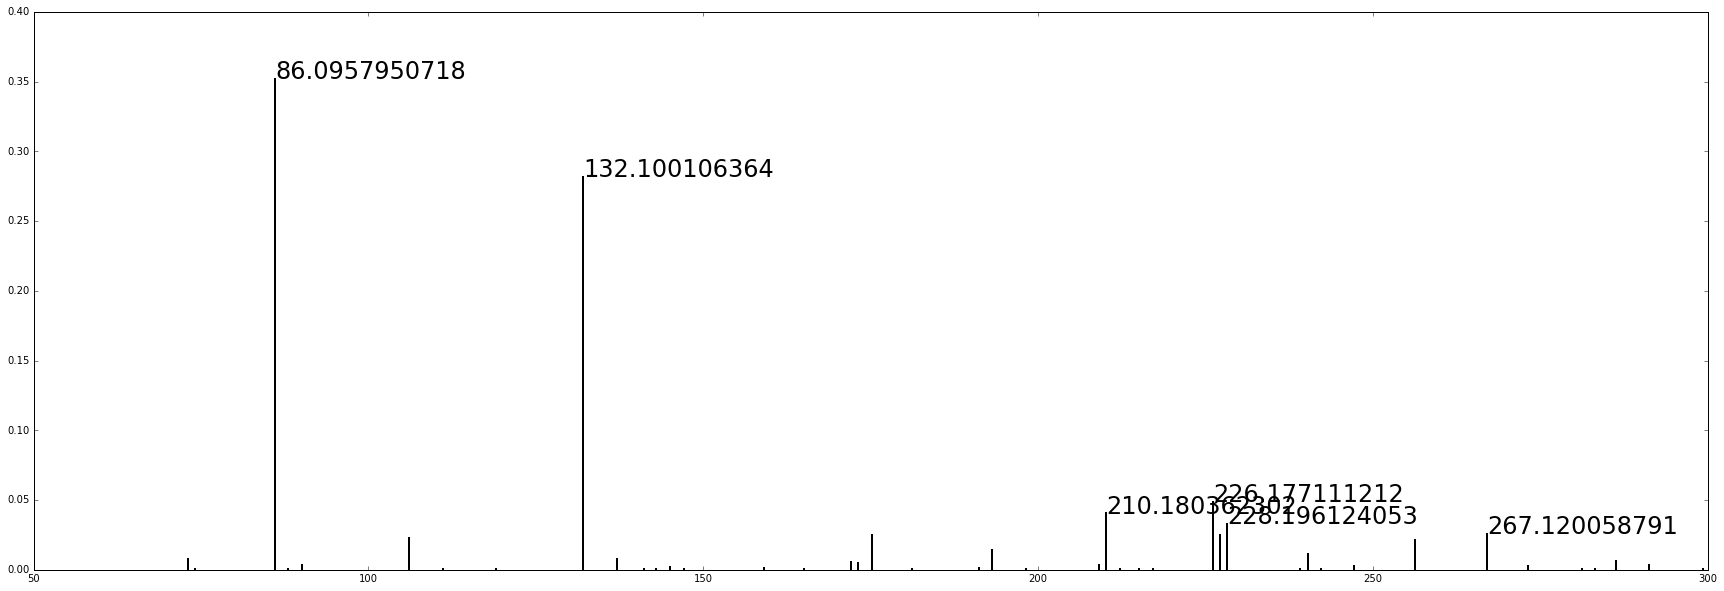

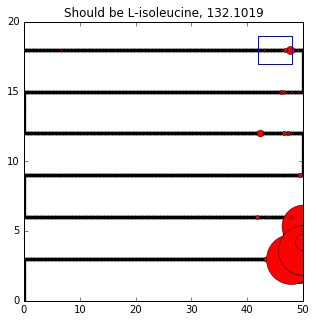

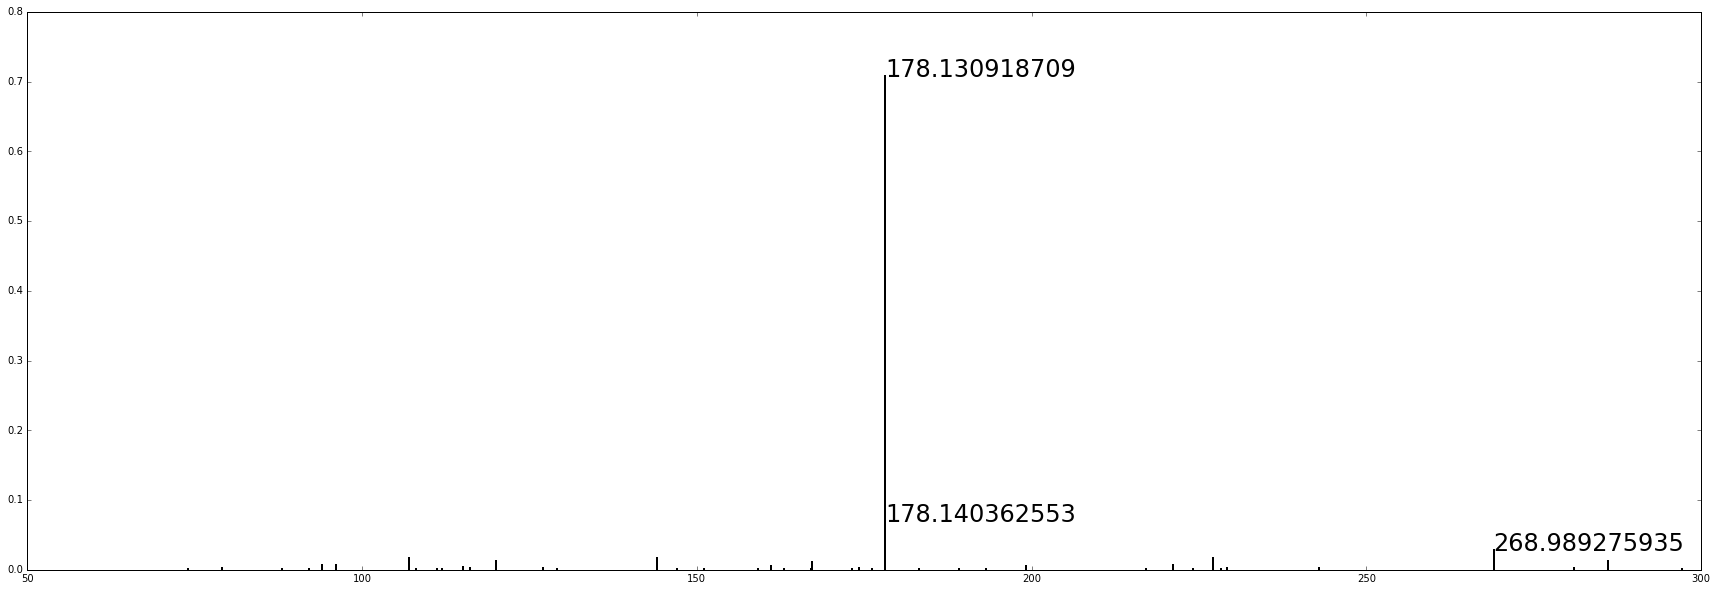

In [130]:
for j in range(len(y_min)):
    for i in range(len(x_min)):
        p = prop[(i,j)]
        best_topic = p.argmax()
        ig.plot(vals=v_lda.get_topic_as_doc_dict(best_topic),figsize=(5,5))
        plt.plot([x_min[i],x_max[i],x_max[i],x_min[i],x_min[i]],[y_min[j],y_min[j],y_max[j],y_max[j],y_min[j]])
        if (i,j) in ground_truth:
            plt.title("Should be {}, {}".format(ground_truth[(i,j)],amino_acids[ground_truth[(i,j)]]))
        plot_topic_dict(v_lda.get_topic_as_dict(best_topic),label_thresh=0.025)

In [132]:
m1 = 268.177525851
m2 = 268.192313019
1e6*np.abs(m1-m2)/m1

55.139475066280539